# Surprise Housing

Business Goal 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

###### Import the libraries

In [1]:
# Import the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

import statsmodels.api as sm

from sklearn import metrics
from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


# Data Understanding

###### Load the data

In [2]:
# Import the data for house price
df_data = pd.read_csv('train.csv')

In [3]:
# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_data.shape

(1460, 81)

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are a few columns with null values. We will check null values shortly

In [6]:
df_data.describe(percentiles=[.25, .5, .75, .9])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,7550

We can see some outliers in few columns like LotFrontage, LotArea, MaxVnrArea, etc. We will visualise it in a while during data cleaning

### Target variable is SalePrice

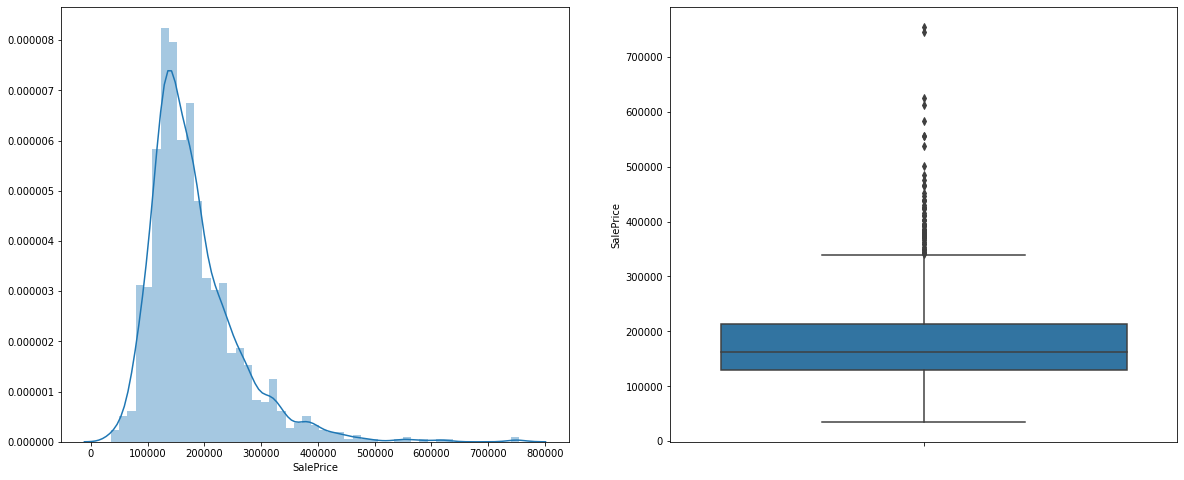

In [7]:
#visualise saleprice distribution
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.distplot(df_data.SalePrice)

plt.subplot(1,2,2)
sns.boxplot(y=df_data.SalePrice)
plt.show()

In [8]:
print(df_data.SalePrice.describe(percentiles = [0.25,0.50,0.75,0.90,1]))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
100%     755000.000000
max      755000.000000
Name: SalePrice, dtype: float64


SalePrice has a slight right-skewed distribution.

Most prices seem to be below 350,000

Let us see the affect of log distribution of sale price

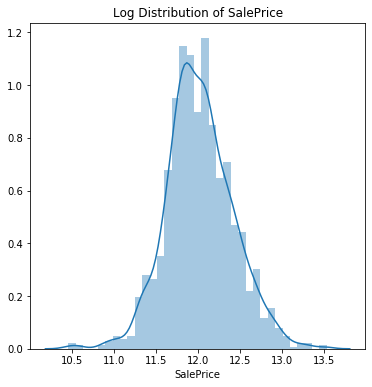

In [9]:
#visualise log distribution of saleprice
plt.figure(figsize=(6,6))
sns.distplot(np.log(df_data['SalePrice']))
plt.title('Log Distribution of SalePrice')
plt.show()

The log of SalePrice gives a nice normal curve. We will do this transformation during Data Preparation

In [10]:
#check if there are columns with 1 unique value as it is of no use
df_data.columns[df_data.nunique()==1]

Index([], dtype='object')

There are no columns that have single unique value

###### Handling missing values

In [11]:
# Find out the top columns with null values 
round(100*df_data.isnull().sum()/len(df_data.index),2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [12]:
#Identifying and Deleting columns with high number of null values
null_cols = list(df_data.columns[round(100*df_data.isnull().sum()/len(df_data.index),2)>40])
null_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
df_data.drop(null_cols, axis=1, inplace=True)
df_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [14]:
# Drop the Id field as it has no statistical meaning for determining saleprice
df_data.drop(['Id'], axis=1, inplace=True)
df_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
# Find out the remaining columns with null values 
null_cols = round(100*df_data.isnull().sum()/len(df_data.index),2).sort_values(ascending=False)
null_cols = null_cols[null_cols > 0]
null_cols

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageCond       5.55
GarageQual       5.55
GarageFinish     5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### Impute null values for above columns

For categorical variables create a new category 'none' for null values to avoid loss of information. 

For Numerical variables impute using median value. There are a few outliers so median will be a better choice over mean value.

In [16]:
for col in null_cols.index:
    if df_data[col].dtype == 'object':
        df_data[col] = df_data[col].fillna('none')
    else:
        df_data[col] = df_data[col].fillna(df_data[col].median())

In [17]:
# Find out the remaining columns with null values 
round(100*df_data.isnull().sum()/len(df_data.index),2).sort_values(ascending=False)


SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
MSSubClass      0.0
Length: 75, dtype: float64

There are no more null values in the data set

### Outlier treatment

In [18]:
df_data.describe(percentiles = [0.25,0.50,0.75,0.90,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.0

Lot frontage has some outliers lets visualise it

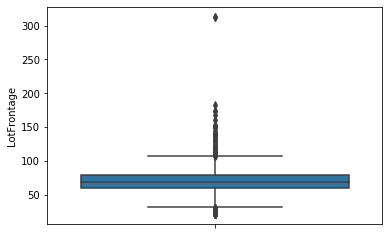

In [19]:
sns.boxplot(y=df_data.LotFrontage)
plt.show()

In [20]:
df_data[df_data.LotFrontage > 200]["LotFrontage"]#.count()

934     313.0
1298    313.0
Name: LotFrontage, dtype: float64

LotFrontage of 313 feet looks like an error in reading and an artificial outlier. We will see its value for large area plots 

In [21]:
df_data[(df_data.LotArea > 70000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,69.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000
335,190,RL,69.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,700,8,2008,WD,Normal,228950
451,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,0,12,2006,WD,Normal,280000
706,20,RL,69.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,0,6,2007,WD,Normal,302000


In [22]:
#Replace ooutlier with median value which seems more appropriate
df_data['LotFrontage'].replace(313, df_data['LotFrontage'].median(), inplace=True)
df_data.shape

(1460, 75)

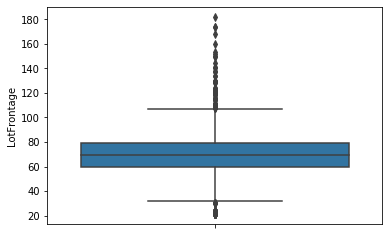

In [23]:
#Check after removing outliers
sns.boxplot(y=df_data.LotFrontage)
plt.show()

LotArea also has outliers. As we saw LotArea above 100000 is a rare occurance. It is like a natural outlier. 

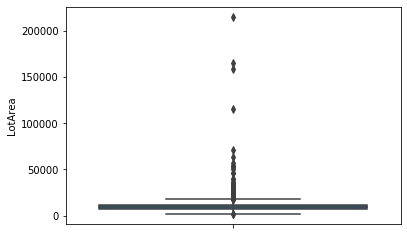

In [24]:
sns.boxplot(y=df_data.LotArea)
plt.show()

In [25]:
df_data[(df_data.LotArea > 70000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,69.0,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000
335,190,RL,69.0,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,700,8,2008,WD,Normal,228950
451,20,RL,62.0,70761,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,5,1975,1975,Gable,WdShngl,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,655,Unf,0,878,1533,GasA,TA,Y,SBrkr,1533,0,0,1533,1,0,2,0,2,1,Gd,5,Typ,2,Attchd,1975.0,Unf,2,576,TA,TA,Y,200,54,0,0,0,0,0,12,2006,WD,Normal,280000
706,20,RL,69.0,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,0,6,2007,WD,Normal,302000


Very high LotArea has a very high price too which seems consistent with data, hence not making any change for it 

# UNIVARIATE AND BIVARIATE ANALYSIS

In [26]:
#Get the list of numerical variables
num_vars = df_data.select_dtypes(include=['float64','int64']).columns.tolist()
num_vars


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
#Get the list of categorical variables
cat_vars = df_data.select_dtypes(include=['object']).columns.tolist()
cat_vars

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [28]:
#To check if all the columns are included in the lists
print(len(num_vars) + len(cat_vars))

75


Check correlation between numerical variables 

In [29]:
corr = df_data[num_vars].corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.384251,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.384251,1.000000,0.274935,0.228428,-0.064736,0.120852,0.073092,0.168421,0.140388,0.051333,0.145563,0.311442,0.357960,0.074445,0.043060,0.329173,0.064540,-0.003638,0.184696,0.047871,0.246611,-0.001857,0.310463,0.219769,0.065280,0.290181,0.316491,0.081087,0.125194,0.017250,0.069816,0.045758,0.099892,0.001179,0.013433,0.004683,0.362643
LotArea,-0.139781,0.274935,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.228428,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.064736,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.120852,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.073092,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.168421,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.140388,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.051333,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


###### Plot Heatmap to visualise correlation

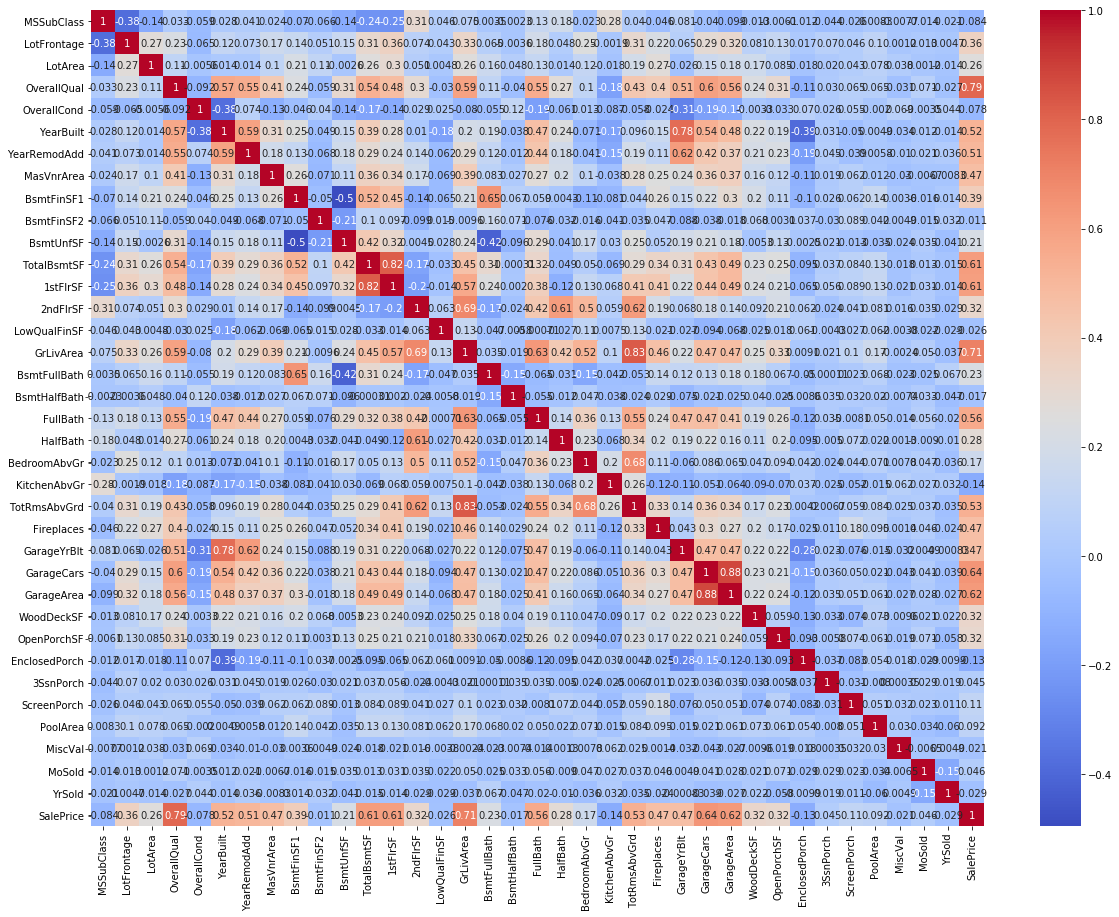

In [30]:
# plotting a heatmap
plt.figure(figsize = (20, 15))
# heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()

#### Understand correlation with target variable and identify Multicollinearity

SalePrice has high correlation with some variables like OverallQual, GrLivArea, GarageCars, TotalBsmtSF.

Besides, there is high correlation between some independent variables also like YearBuilt and GarageYrBlt, GrLivArea and TotRmsAbvGrd indicating presence of multicollinearity in the dataset.

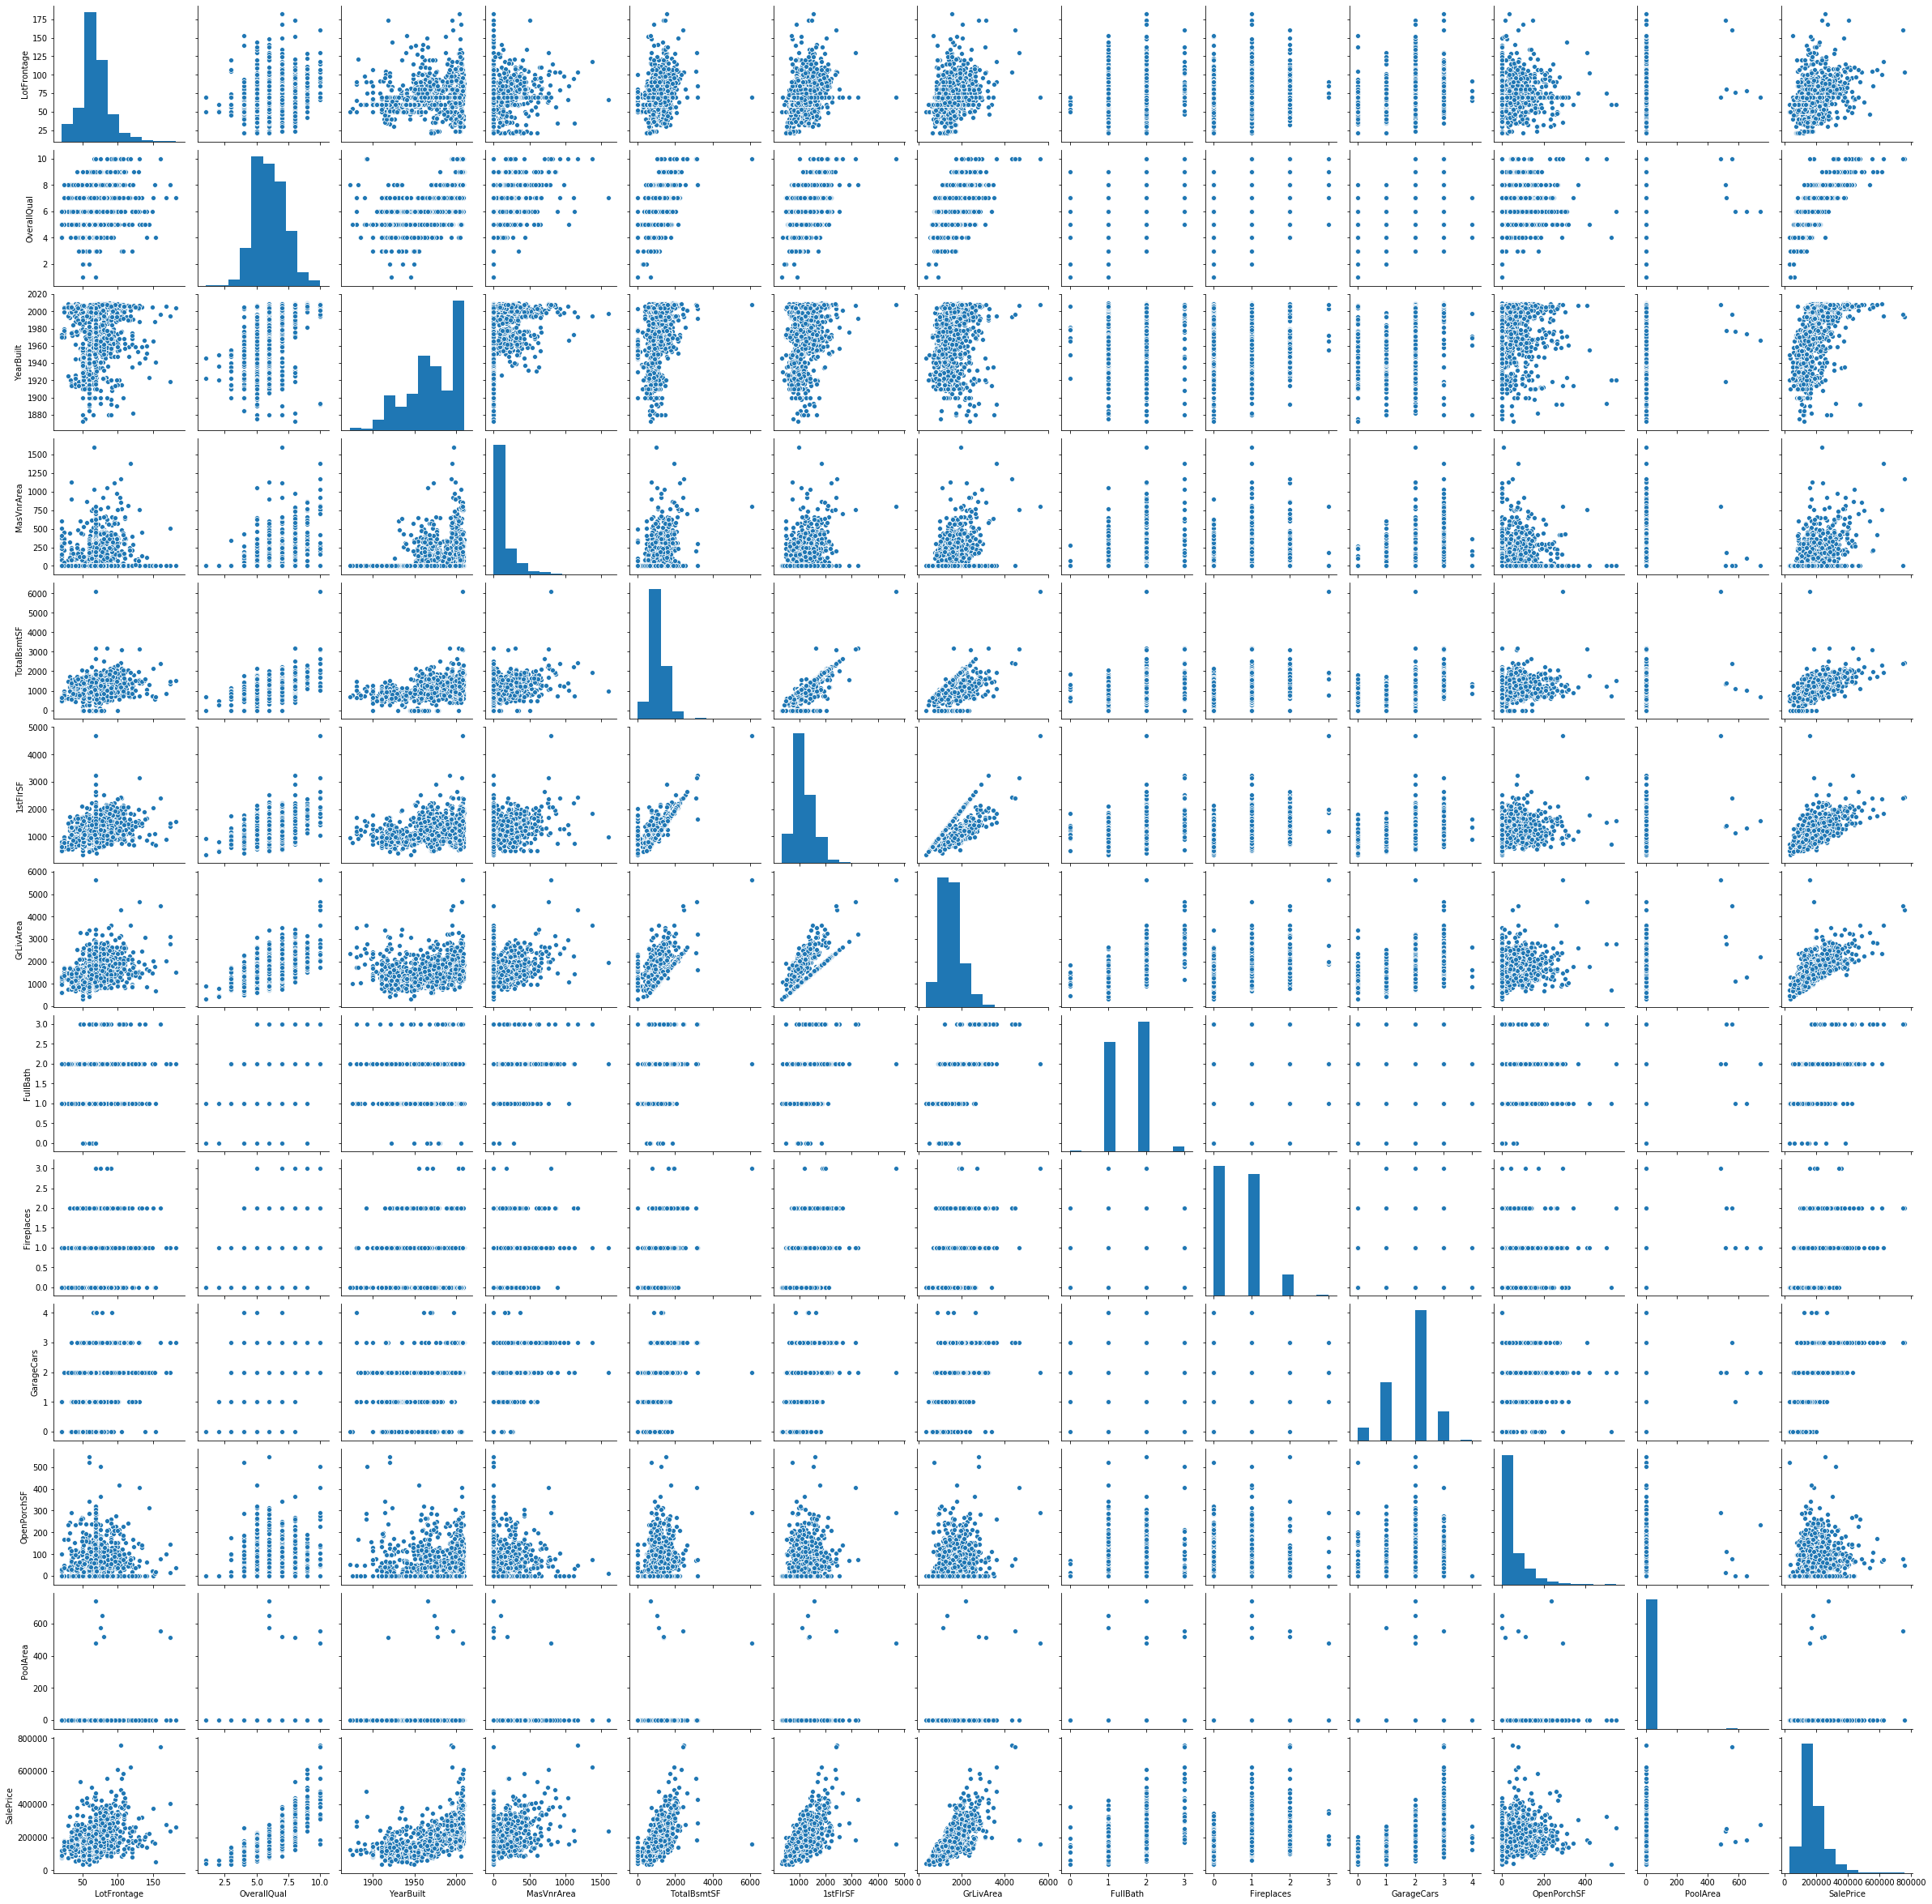

In [31]:
#creating pairplot of few selected numerical variables based on their correlation values with sale price
sel_num_vars = ['LotFrontage', 'OverallQual', 'YearBuilt', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'Fireplaces', 'GarageCars', 'OpenPorchSF', 'PoolArea', 'SalePrice']
sns.pairplot(df_data[sel_num_vars])
plt.show()

SalePrice has a visible linear correlation with OverallQual, YearBuilt, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars

###### Visualize Categorical Variables

In [32]:
#Function to plot countplot and barplot with average price for categorical variables
def univar_plot(var_name):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14,7))
    display(Markdown("Analysis of "+var_name+" and Avg. Sale Price"))
    sns.countplot(var_name, data=df_data, ax=ax1, order=sorted(df_data[var_name].unique()))
    sns.barplot(x=var_name, y='SalePrice', data=df_data, estimator=np.mean, ax=ax2, order= sorted(df_data[var_name].unique()))
    #sns.boxplot(x=var_name, y='price', data=car_data, estimator=np.mean, ax=ax2, order= sorted(car_data[var_name].unique()))
    ax2.set_ylabel('Avg. Sale Price')
    #rotate the xticks for long tick labels
    #if var_name == 'CarName':
    ax1.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
        
    plt.show()

Analysis of MSZoning and Avg. Sale Price

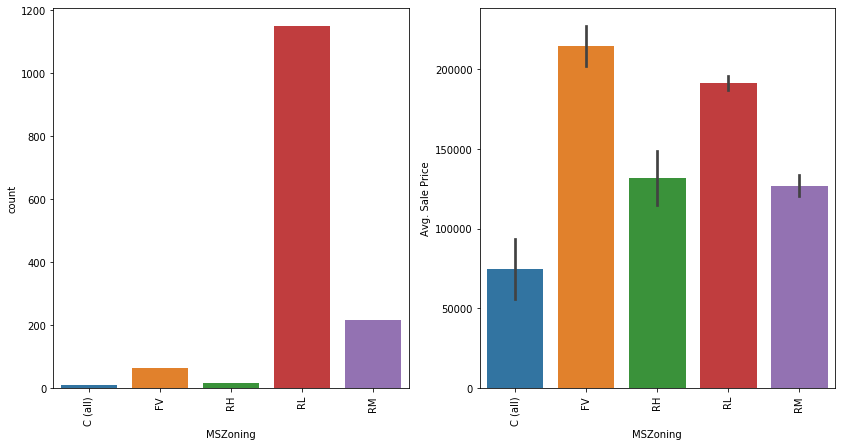

Analysis of Street and Avg. Sale Price

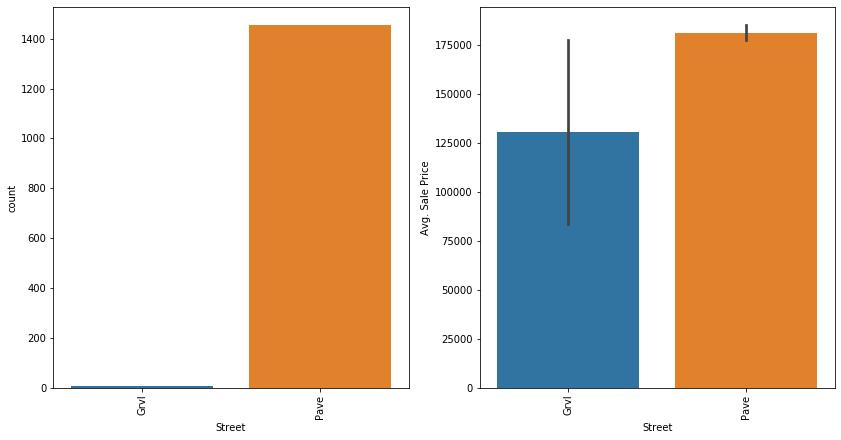

Analysis of LotShape and Avg. Sale Price

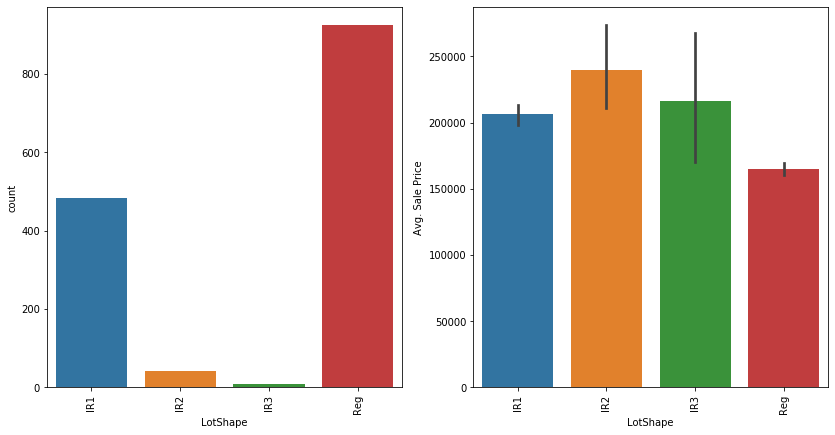

Analysis of LandContour and Avg. Sale Price

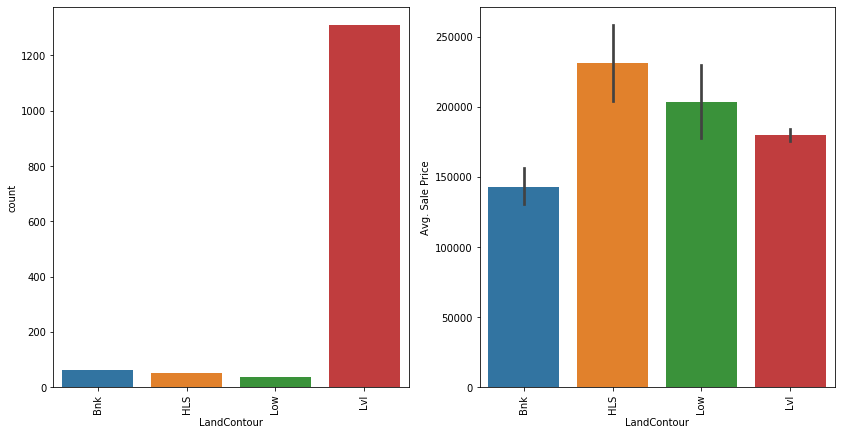

Analysis of Utilities and Avg. Sale Price

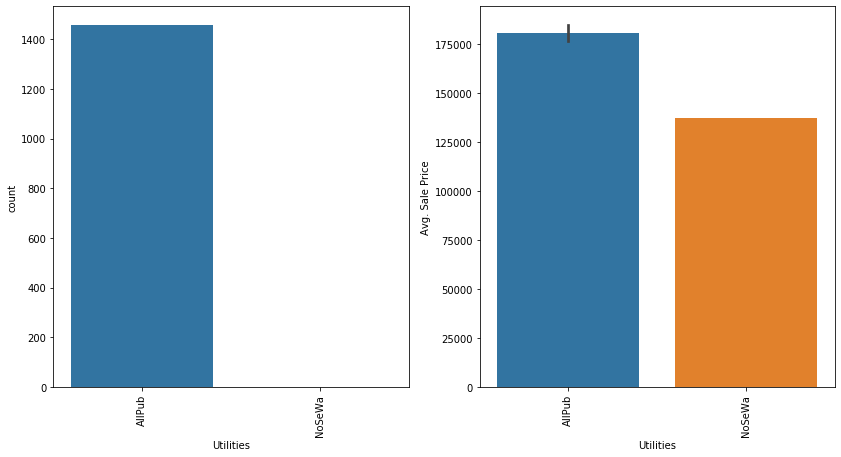

Analysis of LotConfig and Avg. Sale Price

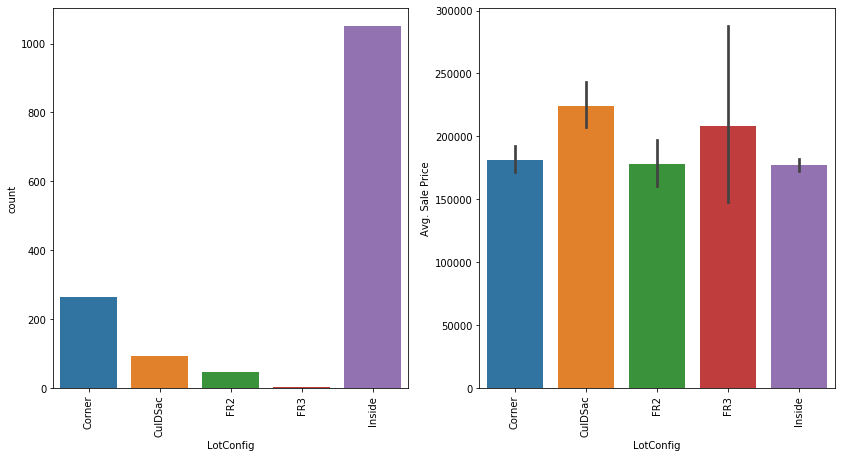

Analysis of LandSlope and Avg. Sale Price

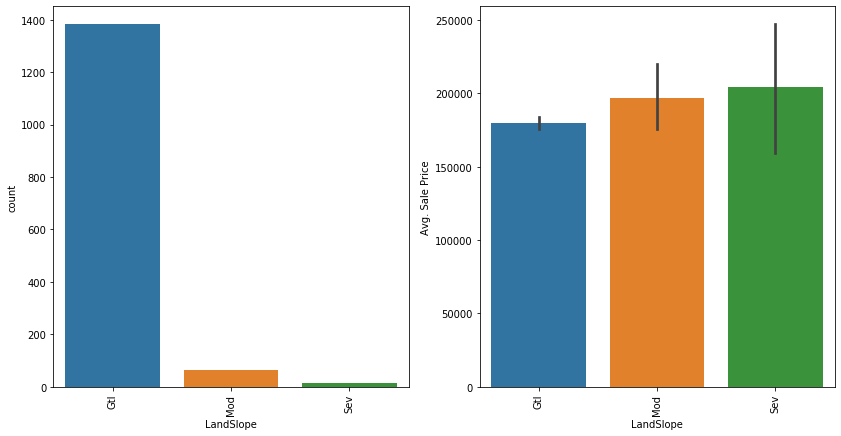

Analysis of Neighborhood and Avg. Sale Price

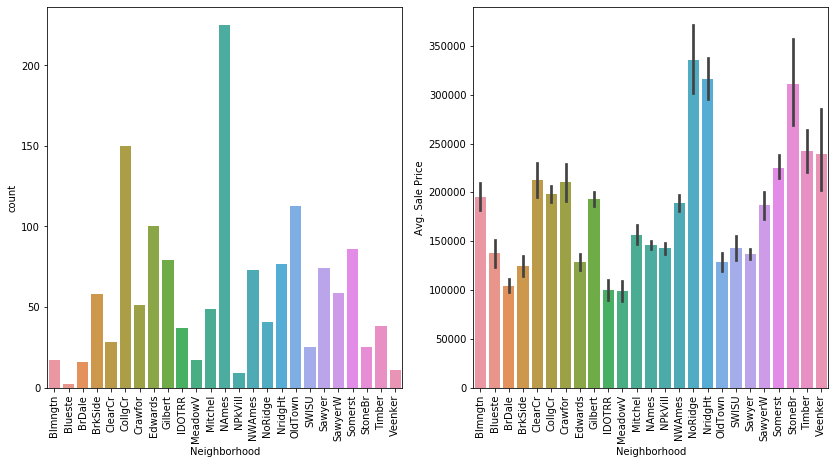

Analysis of Condition1 and Avg. Sale Price

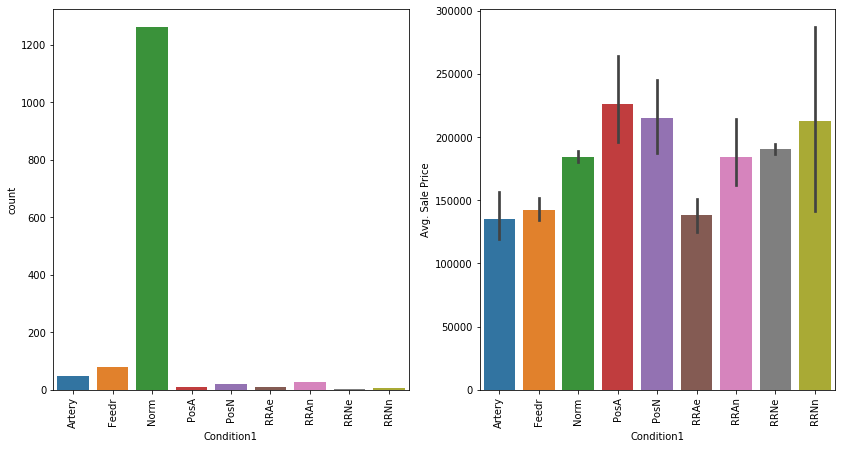

Analysis of Condition2 and Avg. Sale Price

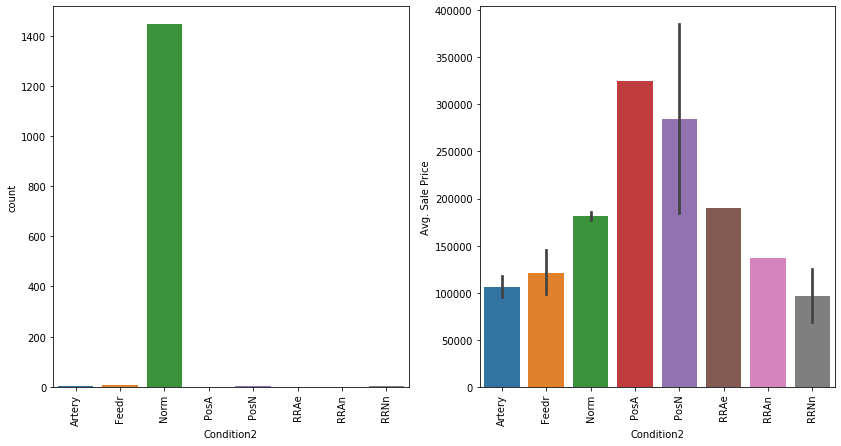

Analysis of BldgType and Avg. Sale Price

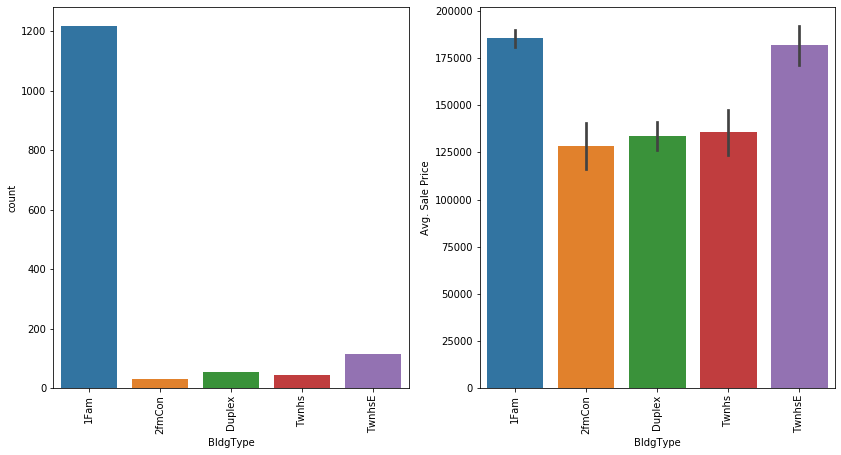

Analysis of HouseStyle and Avg. Sale Price

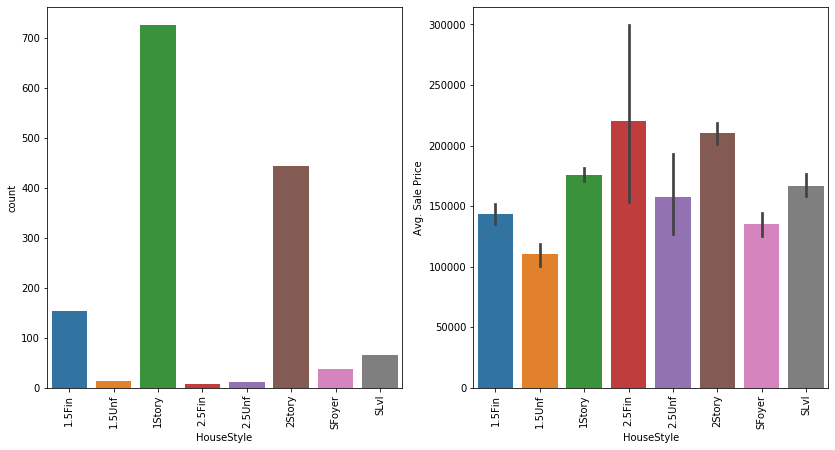

Analysis of RoofStyle and Avg. Sale Price

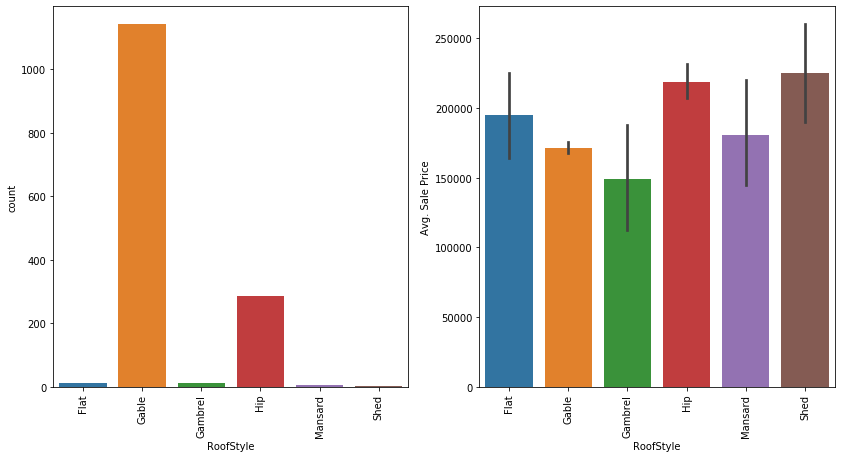

Analysis of RoofMatl and Avg. Sale Price

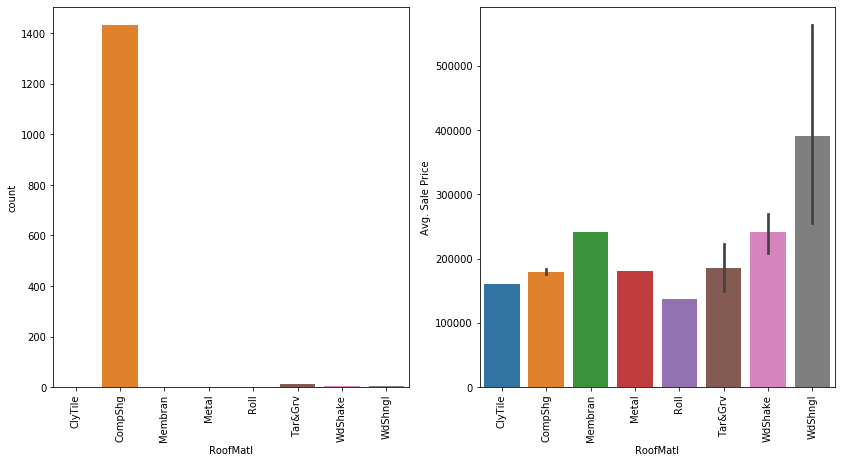

Analysis of Exterior1st and Avg. Sale Price

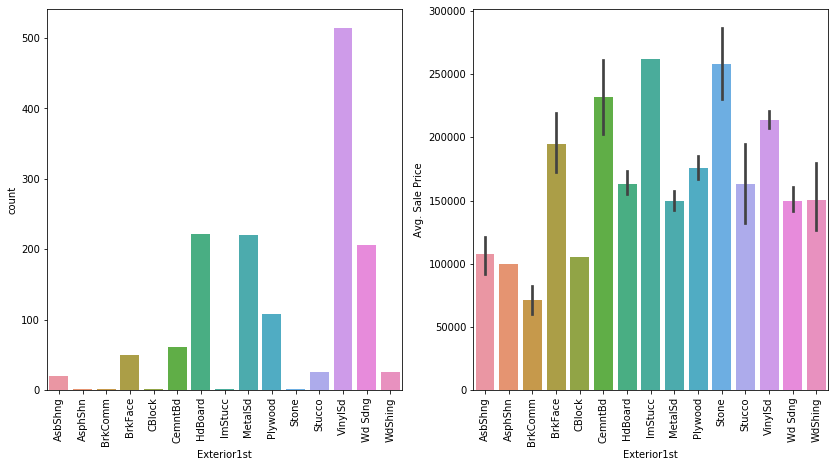

Analysis of Exterior2nd and Avg. Sale Price

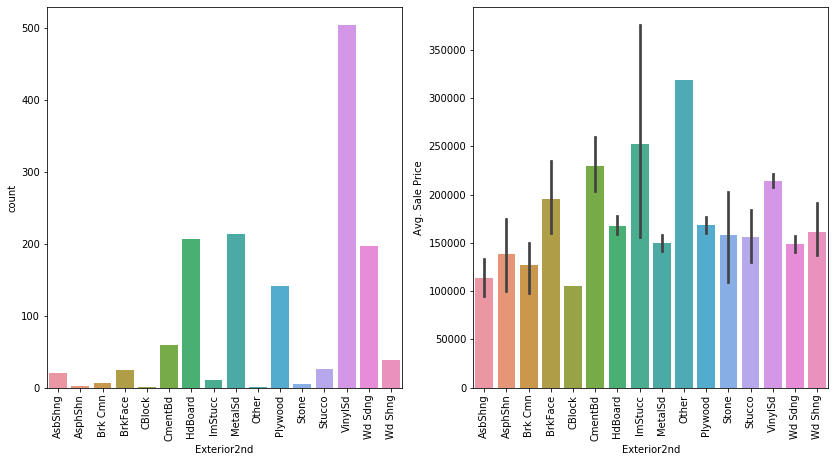

Analysis of MasVnrType and Avg. Sale Price

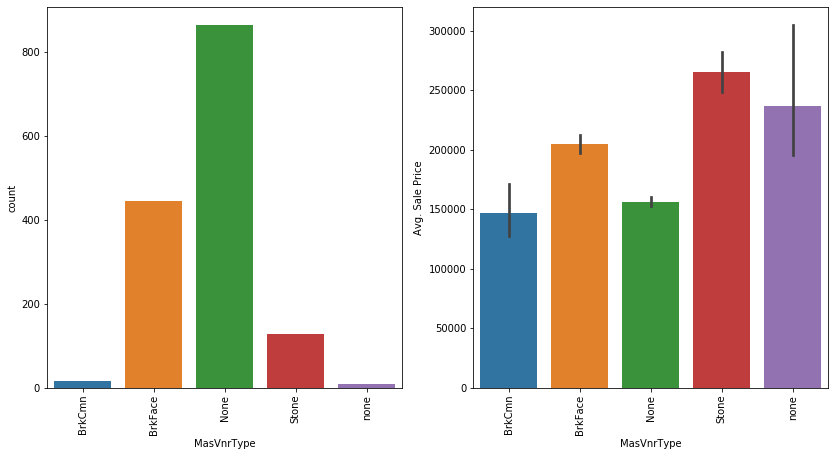

Analysis of ExterQual and Avg. Sale Price

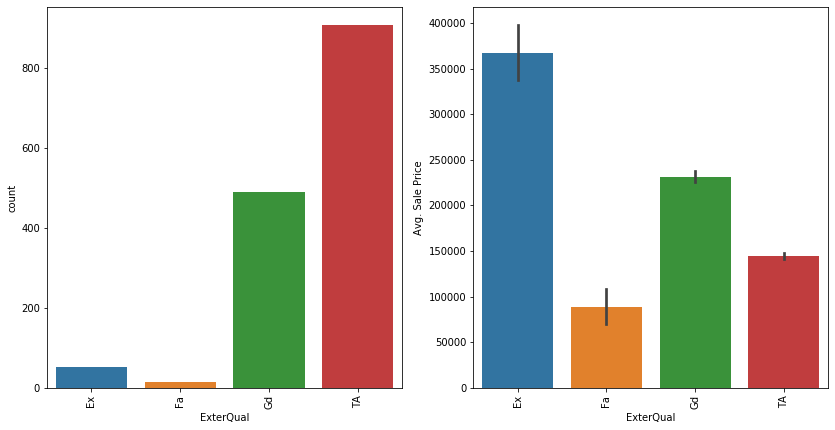

Analysis of ExterCond and Avg. Sale Price

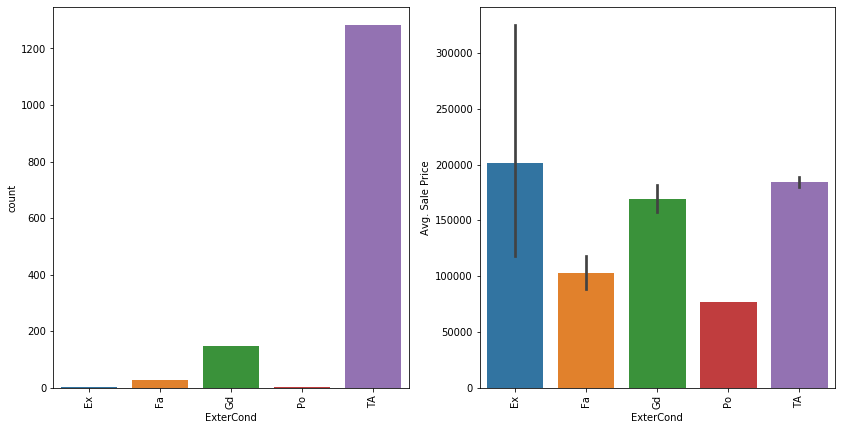

Analysis of Foundation and Avg. Sale Price

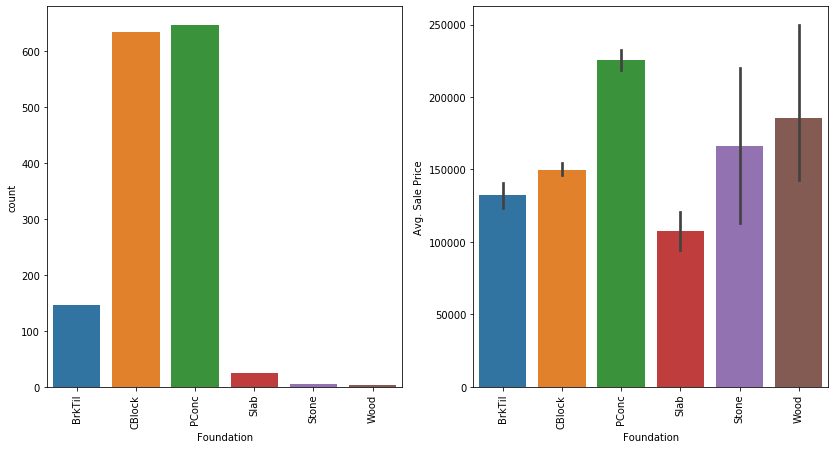

Analysis of BsmtQual and Avg. Sale Price

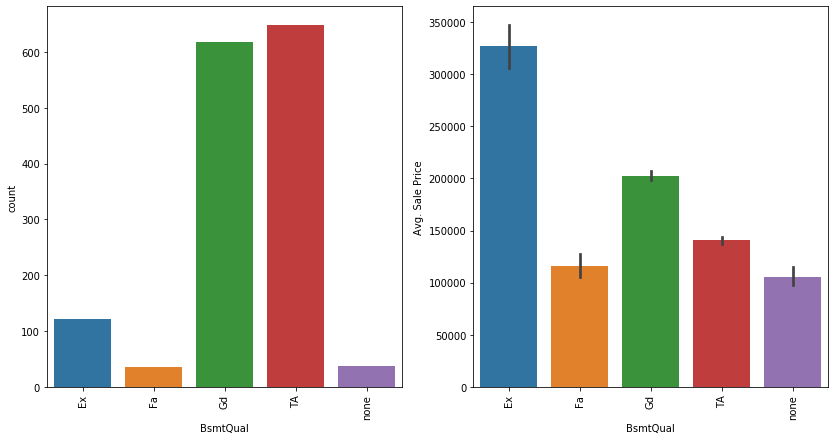

Analysis of BsmtCond and Avg. Sale Price

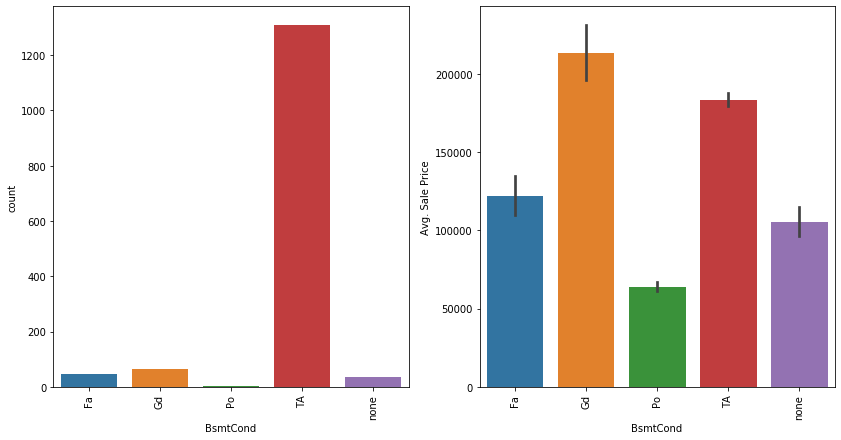

Analysis of BsmtExposure and Avg. Sale Price

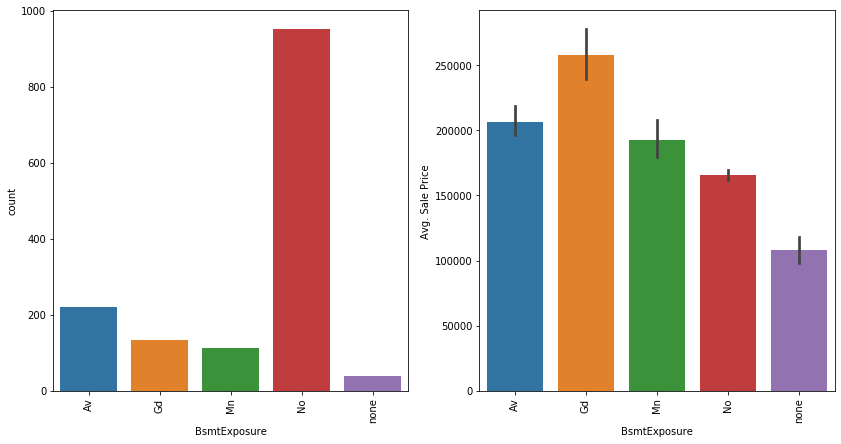

Analysis of BsmtFinType1 and Avg. Sale Price

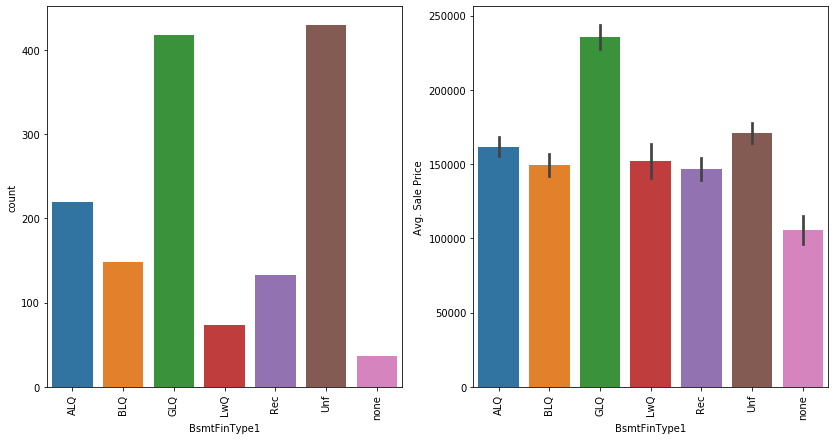

Analysis of BsmtFinType2 and Avg. Sale Price

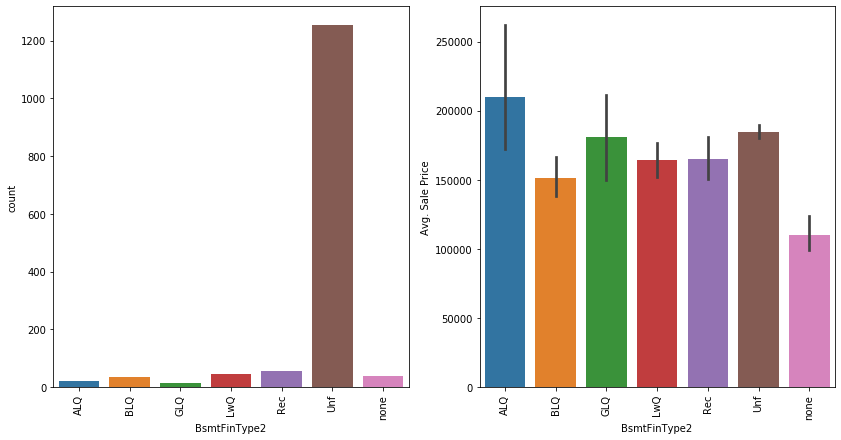

Analysis of Heating and Avg. Sale Price

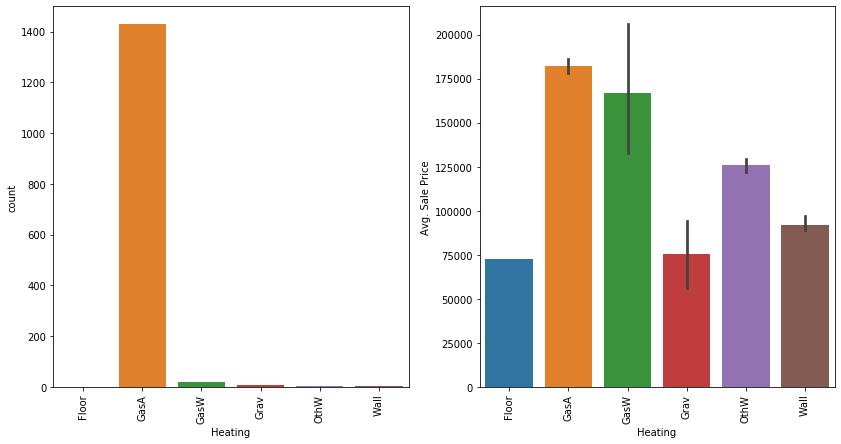

Analysis of HeatingQC and Avg. Sale Price

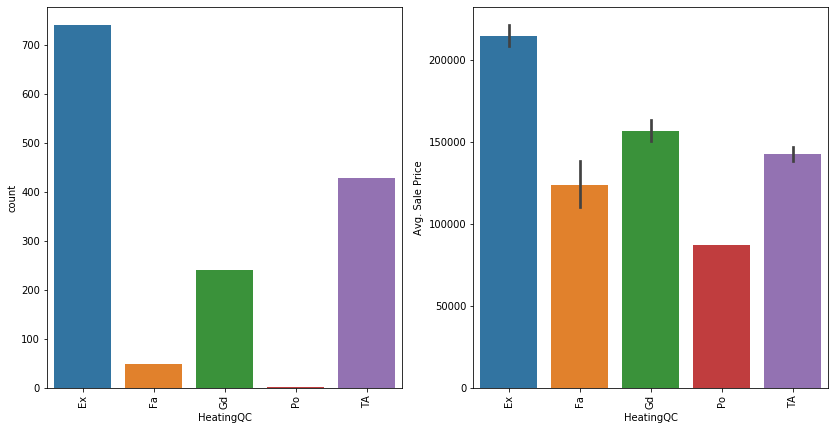

Analysis of CentralAir and Avg. Sale Price

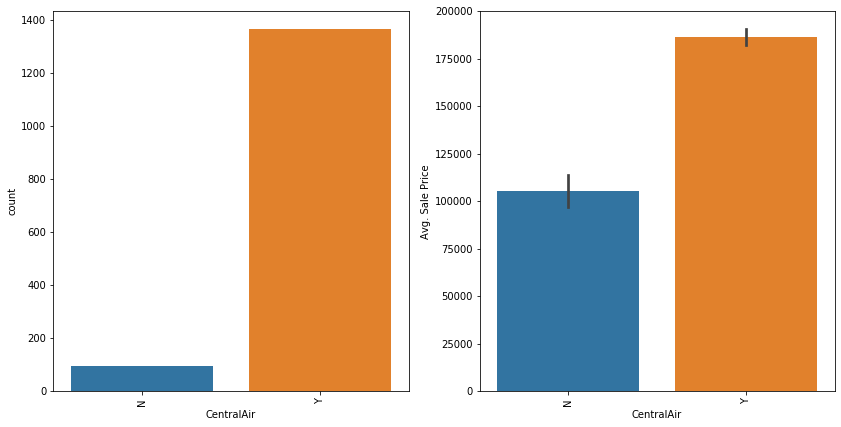

Analysis of Electrical and Avg. Sale Price

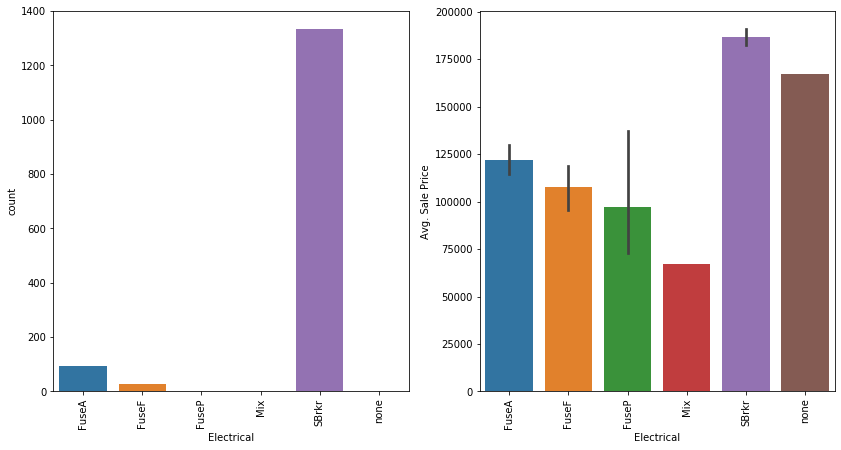

Analysis of KitchenQual and Avg. Sale Price

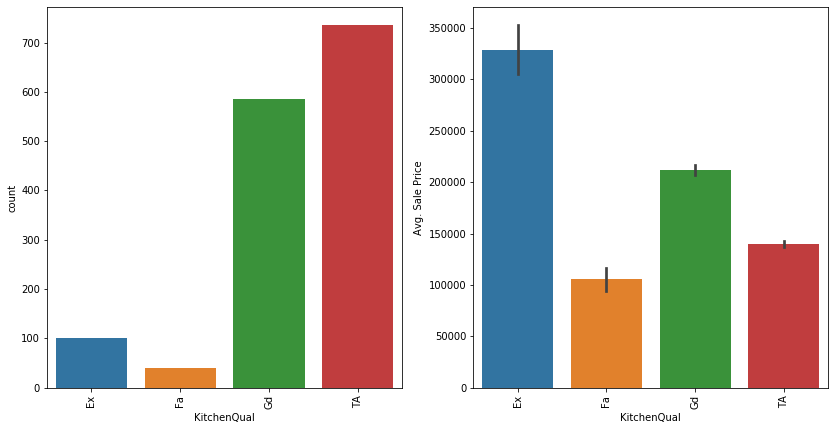

Analysis of Functional and Avg. Sale Price

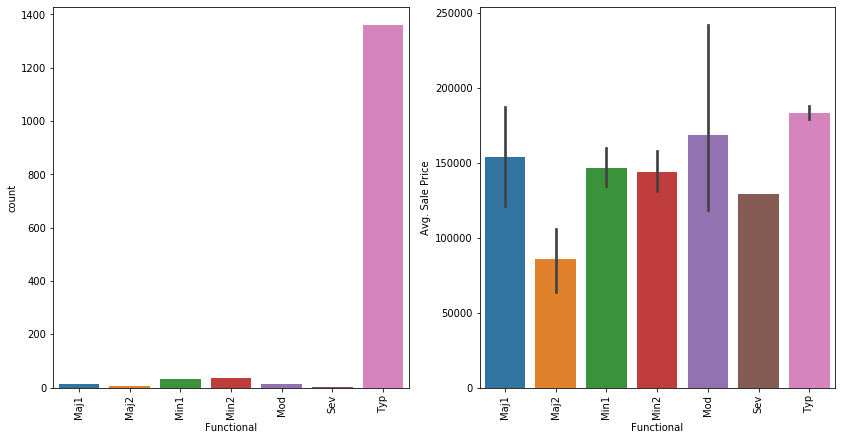

Analysis of GarageType and Avg. Sale Price

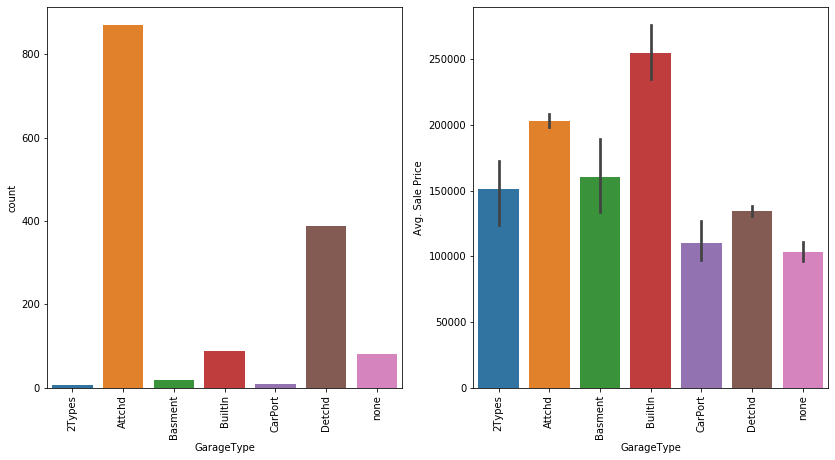

Analysis of GarageFinish and Avg. Sale Price

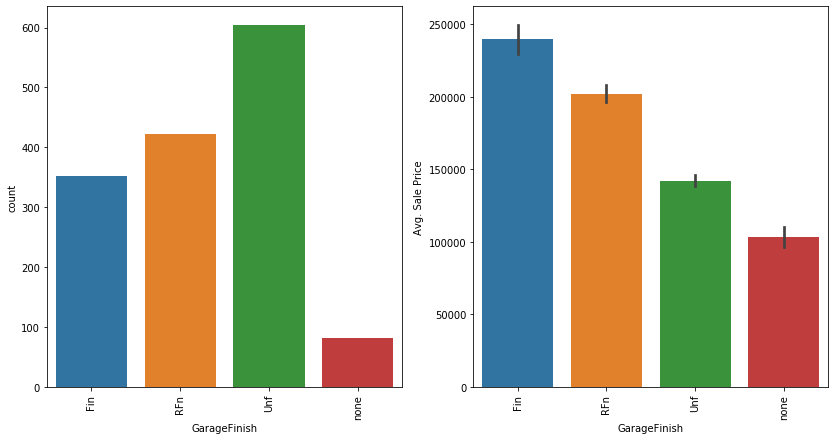

Analysis of GarageQual and Avg. Sale Price

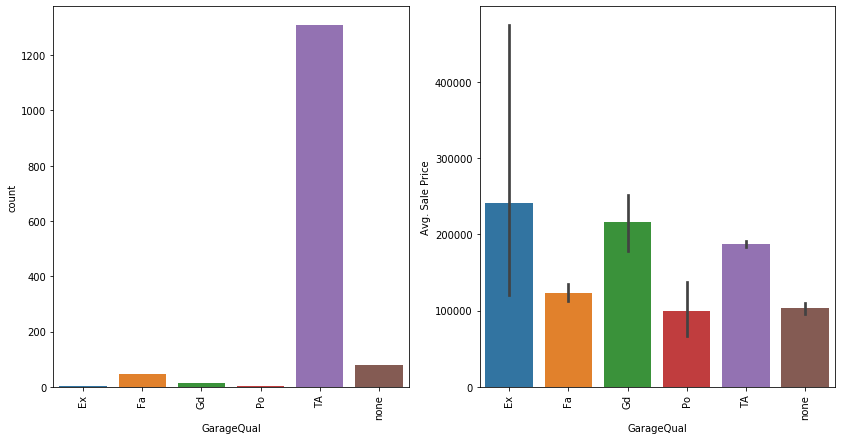

Analysis of GarageCond and Avg. Sale Price

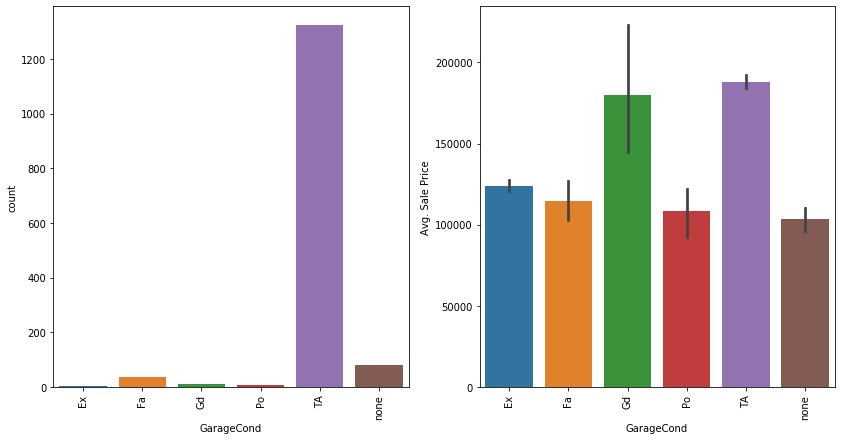

Analysis of PavedDrive and Avg. Sale Price

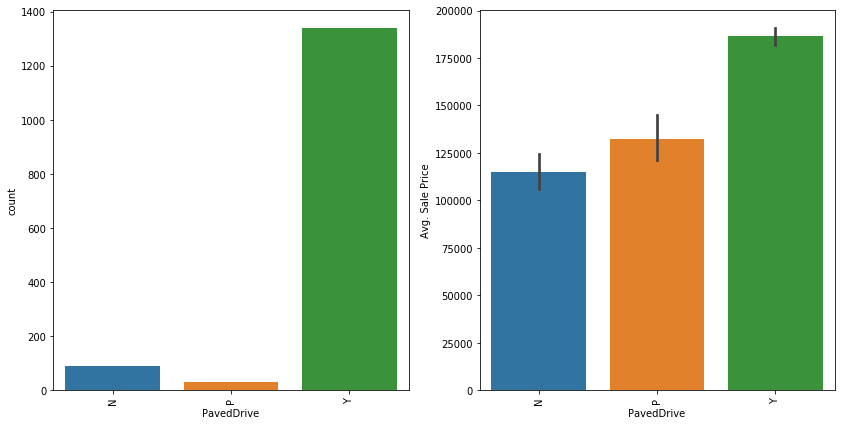

Analysis of SaleType and Avg. Sale Price

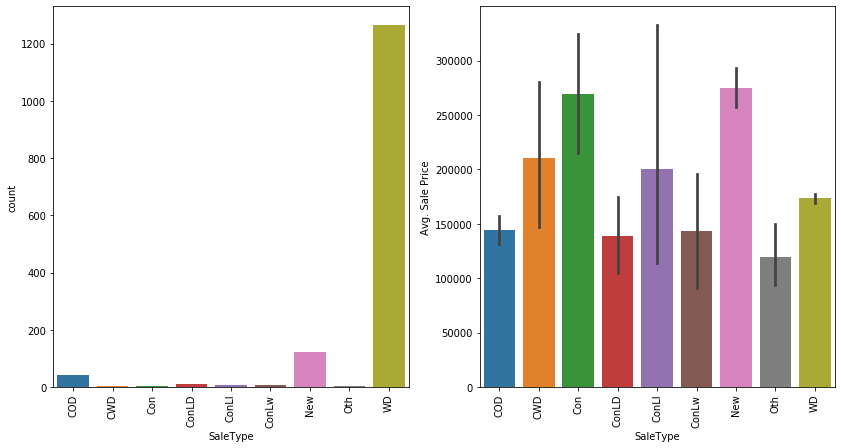

Analysis of SaleCondition and Avg. Sale Price

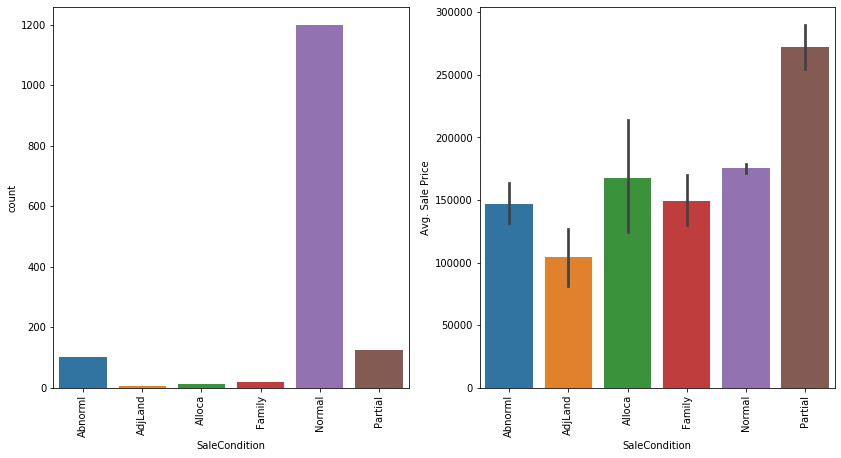

In [33]:
#Univariate plots for categorical variables***
#plt.figure(figsize=(20,20))
for var in cat_vars:
    univar_plot(var)

Segmented Univariate Analysis

In [34]:
def plot_categorical(lst):
    plt.figure(figsize=(20,50))
    cols = 3
    rows = len(lst)//3 + 1
    for i in range(1,len(lst)):
        plt.subplot(rows, 3, i)
        sns.boxplot(x=lst[i-1], y='SalePrice', data=df_data)
    plt.show

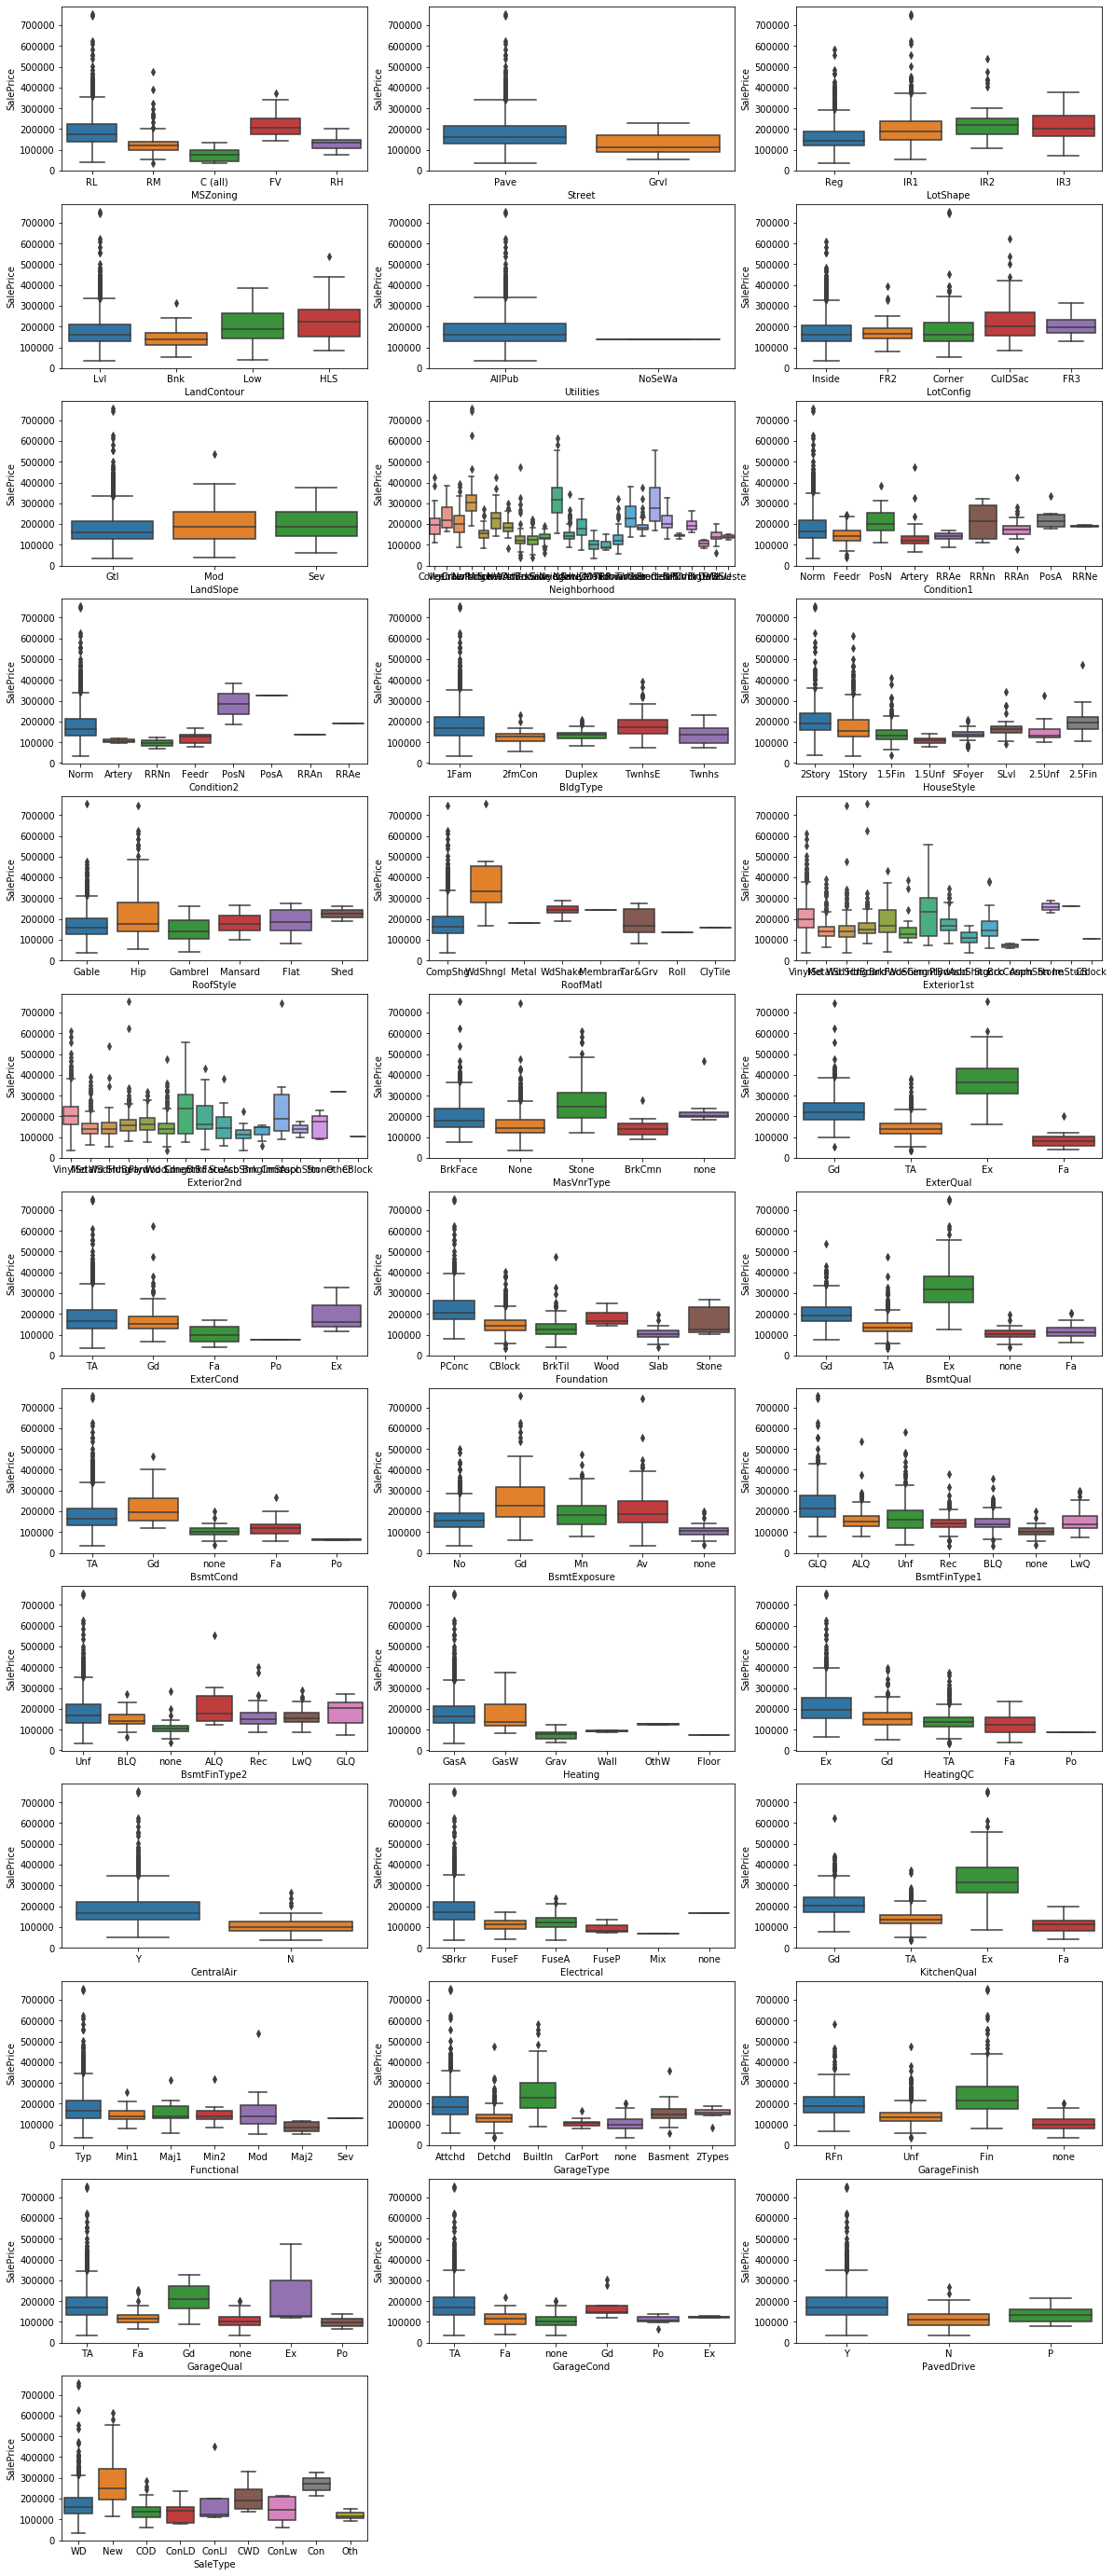

In [35]:
plot_categorical(cat_vars)

### Result of Univariate And Segmented Univariate Analysis of Categorical Variables

1.	MSZoning: Houses in zone ‘Residential Low Density’ have higher prices and sell more than other categories
2.	Street: Houses with ‘Paved’ access have higher average sale price than ‘Gravel’ access
3.	LotShape: General shape of property has no significant impact on average Sale Price
4.	LandContour: Houses ‘Near Flat/Level’ sell more but houses on hillside have higher average sale price
5.	Utilities, LotConfig, LandSlope types do not have much influence on the sale price 
6.	Neighborhood: Northridge, Northridge Heights, Stone Brook, Timberland, Veenker have the highest average sale price among various locations within Ames city limits
7.	Condition1 and Condition2: Houses with Normal condition sell more but Near or Adjacent to positive off-site feature--park, greenbelt, etc. have higher sale price
8.	BldgType: Single-family Detached house sell more and have higher process also
9.	HouseStyle, RoofStyle, Roof Material, Exterior covering on house, Masonry veneer type do not have significant influence on the sale price 
10.	ExterQual:  Houses with Average/Typical exterior quality sell more but have lower sale price; while those with Excellent exterior quality less but have higher average sale price
11.	ExterCond, Foundation do not have significant influence on the sale price 
12.	BsmtQual: Basement with height between 80 – 99 inches sell more but the basement with height above 100 inches have higher sale price
13.	BsmtCond: Good and Excellent general condition have higher sale price
14.	BsmtFinType1: Good Living Quarters or Unfinshed sell more and have slightly higher average sale price



##### Bivariate Analysis of key variables

In [36]:
# Function to create count and bar plot for bivariate analysis
def bi_var_plot(x,y,hue):
    frame = df_data#.groupby(x)[y].mean().reset_index(name='avg_price')
    f, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,7), dpi=90) 
    sns.countplot(x=x,data=frame,hue=hue,ax=ax1,order=sorted(frame[x].unique()))
    #ax1.set(xlabel=x_desc, ylabel='count')
    
    sns.barplot(x=x,y=y,data=frame,hue=hue,ax=ax2,estimator=np.mean, order=sorted(frame[x].unique()))
    #ax2.set(xlabel=x_desc, ylabel=y_desc)
    plt.show() 

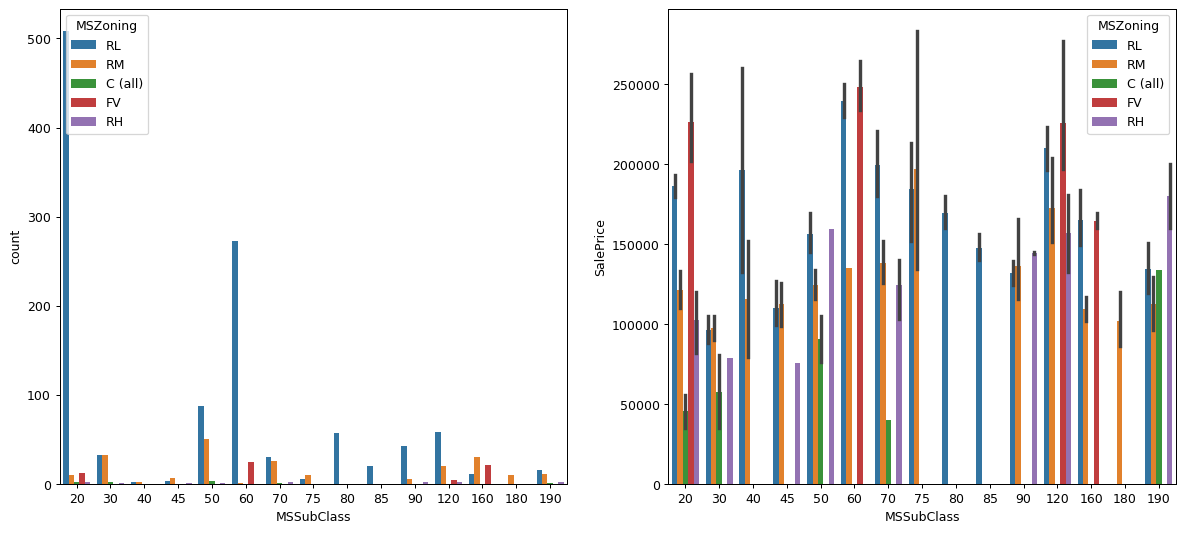

In [37]:
bi_var_plot('MSSubClass','SalePrice','MSZoning')

MSSubClass doesn't seem to have any influence on SalePrice for different MSZoning values 

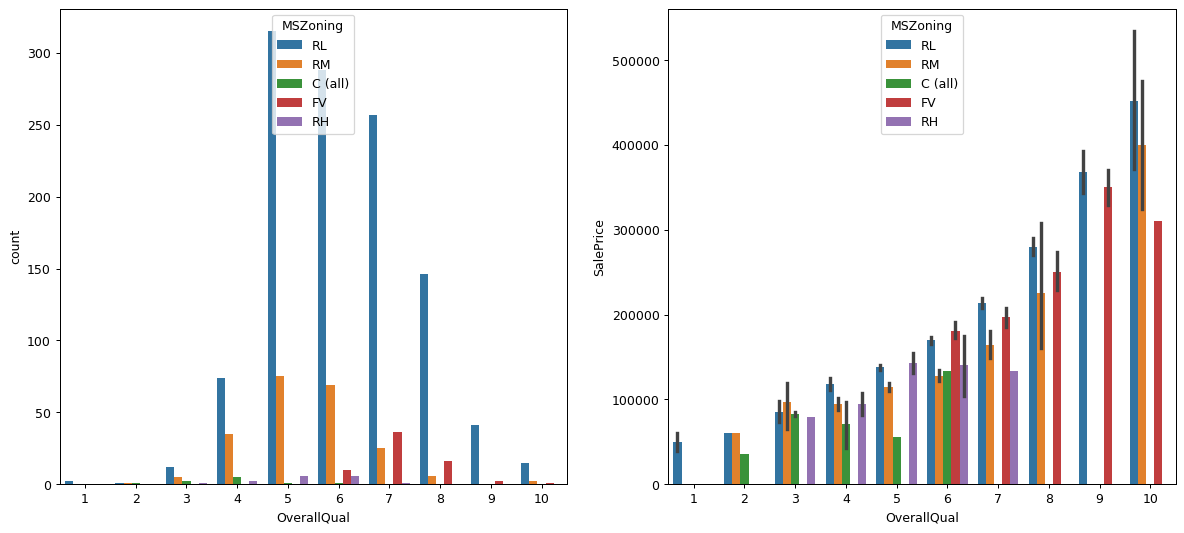

In [38]:
bi_var_plot('OverallQual','SalePrice','MSZoning')

As OverallQual improves, SalePrice also goes up with various MSZoning values

# DATA PREPARATION

## Derived Variables

Derive age of the house and years since last remodelling was done

In [39]:
df_data['HouseAge'] = pd.datetime.now().year - df_data['YearBuilt']
df_data['LastRemod'] = pd.datetime.now().year - df_data['YearRemodAdd']
df_data['GarageYrBlt'] = pd.datetime.now().year - df_data['GarageYrBlt']


Update data type of categorical variables which is numeric as of now

In [40]:
df_data['OverallQual'] = df_data['OverallQual'].astype('object')
df_data['OverallCond'] = df_data['OverallCond'].astype('object')

In [41]:
df_data.shape

(1460, 77)

## DATA PREPARATION FOR MODELLING

In [76]:
#Get y and X from the data frame
y = df_data['SalePrice']
X = df_data.drop('SalePrice', axis=1)

In [77]:
#Get the revised list of numerical and categorical variables as we have done soome transformations and created new cols
numcols = X.select_dtypes(include=['float64','int64']).columns.tolist()
catcols = X.select_dtypes(include='object').columns.tolist()

In [78]:
print(numcols)
print(catcols)

['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'LastRemod']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCo

In [79]:
#Creating dummy variables for all categorical variables
for col in catcols:
    #drop the first column 
    dummies = pd.get_dummies(X[col], drop_first = True)
    # Adding prefix to dummy column names so as to identify it later
    dummies = dummies.add_prefix(f'{col}_')
    # Add the results to the original housing dataframe
    X = pd.concat([X, dummies], axis = 1)
    # Drop original categorical column as we have created the dummies for it
    X.drop([col], axis = 1, inplace = True)

X.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,LastRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,Sa

In [80]:
X.shape

(1460, 260)

In [81]:
y.shape

(1460,)

y = np.log(y)

In [82]:
# split X and y int train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [83]:
# scaling the features using standard scaler
scaler = StandardScaler()

# storing column names in cols, since column names are (annoyingly) lost after 
cols = X.columns
# scaling the numeric columns as we have created dummies for categorical variables
X_train[numcols] = scaler.fit_transform(X_train[numcols])
X_test[numcols] = scaler.transform(X_test[numcols])




In [84]:
X_train.shape

(1022, 260)

In [85]:
X_test.shape

(438, 260)

In [86]:
y_train.shape

(1022,)

In [87]:
y_test.shape

(438,)

In [88]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,HouseAge,LastRemod,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_none,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_none,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,Sa

### Ridge Regression

In [89]:
# list of alphas 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results['Difference'] = cv_results['mean_test_score'] - cv_results['mean_train_score']
print(cv_results[['params', 'mean_test_score', 'mean_train_score', 'Difference']])


               params  mean_test_score  mean_train_score   Difference
0   {'alpha': 0.0001}    -20961.471117     -11890.056396 -9071.414721
1    {'alpha': 0.001}    -20918.381054     -11897.930486 -9020.450568
2     {'alpha': 0.01}    -20761.817680     -12015.449415 -8746.368265
3     {'alpha': 0.05}    -20883.134145     -12535.486549 -8347.647596
4      {'alpha': 0.1}    -21060.233244     -12915.479090 -8144.754154
5      {'alpha': 0.2}    -21059.315058     -13293.862450 -7765.452608
6      {'alpha': 0.3}    -20974.553871     -13485.706074 -7488.847797
7      {'alpha': 0.4}    -20869.145142     -13609.265055 -7259.880087
8      {'alpha': 0.5}    -20766.014409     -13699.528868 -7066.485541
9      {'alpha': 0.6}    -20667.288021     -13771.334799 -6895.953223
10     {'alpha': 0.7}    -20577.736685     -13829.612211 -6748.124474
11     {'alpha': 0.8}    -20494.436210     -13879.166852 -6615.269358
12     {'alpha': 0.9}    -20419.843421     -13922.647042 -6497.196378
13     {'alpha': 1.0

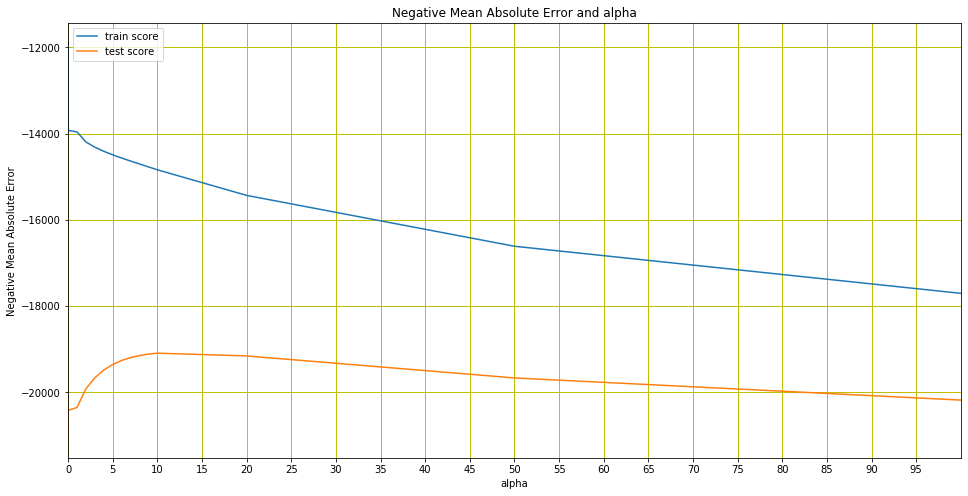

In [91]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 100)
plt.xticks(np.arange(0, 100, 5))
plt.grid(color='y', linestyle='-', linewidth=1)
plt.show()

In [92]:
alphaR = 10
ridge = Ridge(alpha=alphaR)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8902909542799077
0.8758721048848186


In [93]:
# ridge model parameters
model_parameters = list(ridge.coef_)
#model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(31828.919, 'Neighborhood_StoneBr'),
 (30262.676, 'RoofMatl_WdShngl'),
 (27074.074, 'OverallQual_9'),
 (24496.93, 'Neighborhood_NridgHt'),
 (-20943.9, 'Condition2_PosN'),
 (-18228.997, 'Neighborhood_Edwards'),
 (-17943.861, 'ExterQual_TA'),
 (17878.151, 'Neighborhood_NoRidge'),
 (17294.763, 'OverallQual_10'),
 (-17167.455, 'KitchenQual_Gd'),
 (17020.587, 'Neighborhood_Crawfor'),
 (-16937.694, 'KitchenQual_TA'),
 (16763.279, 'BsmtExposure_Gd'),
 (15047.189, 'LandContour_Lvl'),
 (14554.712, 'LandContour_HLS'),
 (-14203.027, 'OverallQual_3'),
 (13770.588, 'OverallCond_9'),
 (-13765.0, 'ExterQual_Gd'),
 (-13022.749, 'LotShape_IR3'),
 (-12711.89, 'OverallQual_5'),
 (-12311.95, 'OverallCond_3'),
 (11809.467, 'GrLivArea'),
 (11707.704, 'Exterior1st_BrkFace'),
 (-11671.701, 'Neighborhood_Gilbert'),
 (-11362.562, 'OverallQual_6'),
 (-11250.435, 'BsmtQual_Gd'),
 (11145.891, 'OverallQual_8'),
 (10720.021, 'GarageCars'),
 (10634.784, 'SaleCondition_Alloca'),
 (10361.328, 'Functional_Typ'),
 (1004

###### Ridge Regression has produced very few variables with zero coefficient.

Model created by Ridge is very complex due to high value of coefficients and it will lead to overfitting

#### Ridge Regression with double the value of selected alpha

In [94]:
alphaR = alphaR*2

ridge = Ridge(alpha=alphaR)

ridge.fit(X_train, y_train)

# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_ridge = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_ridge))

0.8793637818038067
0.87271345168619


In [95]:
# ridge model parameters
model_parameters = list(ridge.coef_)
#model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(22559.551, 'Neighborhood_StoneBr'),
 (22257.239, 'OverallQual_9'),
 (21251.031, 'Neighborhood_NridgHt'),
 (18008.363, 'RoofMatl_WdShngl'),
 (-15481.143, 'Neighborhood_Edwards'),
 (-14962.09, 'ExterQual_TA'),
 (-14765.389, 'KitchenQual_Gd'),
 (14757.392, 'Neighborhood_Crawfor'),
 (-14680.1, 'KitchenQual_TA'),
 (14609.948, 'BsmtExposure_Gd'),
 (12957.607, 'Neighborhood_NoRidge'),
 (11857.257, 'OverallQual_10'),
 (-11818.473, 'Condition2_PosN'),
 (11688.121, 'LandContour_Lvl'),
 (11304.722, 'GrLivArea'),
 (10946.172, 'LandContour_HLS'),
 (10661.089, 'GarageCars'),
 (-10617.504, 'OverallQual_6'),
 (-10608.524, 'Neighborhood_Gilbert'),
 (10580.986, 'OverallCond_9'),
 (-10541.124, 'OverallQual_5'),
 (10372.829, 'OverallQual_8'),
 (-10110.129, 'BsmtQual_Gd'),
 (10085.74, 'Functional_Typ'),
 (-9843.904, 'ExterQual_Gd'),
 (9819.261, 'Exterior1st_BrkFace'),
 (-9724.375, 'OverallQual_3'),
 (-9310.393, 'OverallCond_3'),
 (8998.942, '2ndFlrSF'),
 (8786.811, 'Condition1_Norm'),
 (-8715.665, 'LotSh

Using double the value of alpha has led to:
- Decrease in training and test scores
- Change in the weight of the coeffcients - coefficents have become smaller and therefore the significance of the predictor variables has also changes

## Lasso Regression

In [96]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   36.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [97]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.343325,0.032561,0.000000,0.00000,0.0001,{'alpha': 0.0001},-23224.687975,-19145.807327,-25706.442319,-21038.604537,-15784.358570,-20979.980146,3398.242729,27,-11373.334635,-12003.549199,-11017.976659,-12173.275348,-12909.454915,-11895.518151,657.212633
1,0.293597,0.018340,0.000000,0.00000,0.001,{'alpha': 0.001},-23223.896851,-19141.023900,-25707.832315,-21038.496195,-15783.856307,-20979.021113,3399.194930,26,-11373.343285,-12003.514884,-11017.976652,-12173.284195,-12909.458927,-11895.515589,657.212118
2,0.284389,0.011693,0.000000,0.00000,0.01,{'alpha': 0.01},-23215.966326,-19093.119103,-25706.899920,-21037.389213,-15779.215828,-20966.518078,3404.526061,25,-11373.507397,-12003.334609,-11018.123560,-12173.429272,-12909.567112,-11895.592390,657.186540
3,0.300015,0.038783,0.003125,0.00625,0.05,{'alpha': 0.05},-23180.795121,-19061.808958,-25688.162036,-21033.039462,-15760.300735,-20944.821262,3403.869318,24,-11374.372357,-12002.911642,-11019.596354,-12174.457336,-12910.007133,-11896.268964,656.864893
4,0.290639,0.021195,0.000000,0.00000,0.1,{'alpha': 0.1},-23137.014647,-19060.111951,-25664.749322,-21026.162638,-15742.951148,-20926.197941,3397.054515,23,-11375.622048,-12002.218022,-11021.480624,-12175.700372,-12910.588491,-11897.121911,656.425994


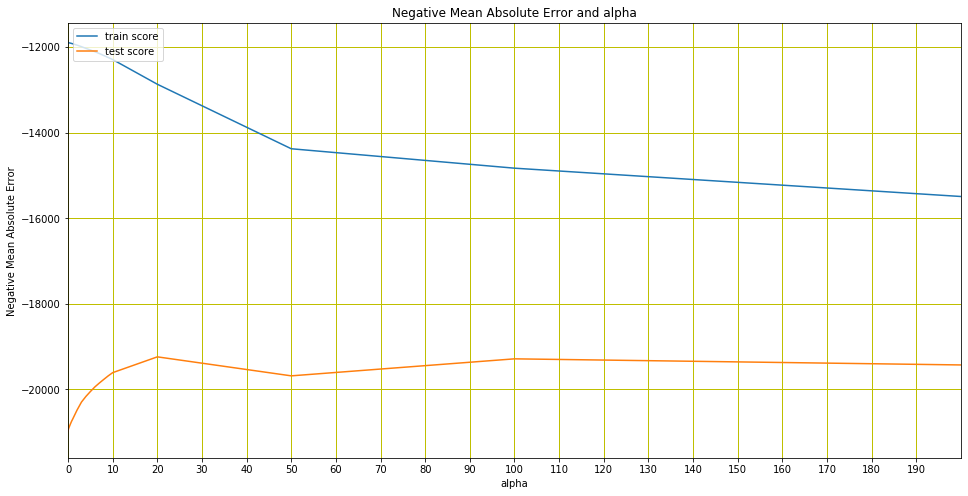

In [98]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='y', linestyle='-', linewidth=1)
plt.show()

In [99]:
alphaL = 100
lasso = Lasso(alpha=alphaL)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8962154960505715
0.8805324738207608


In [100]:
# lasso model parameters
model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
#lasso_selected_features = []
#for k,v in sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)[1:31]:
#    lasso_selected_features.append(v)
lasso_params = sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)
lasso_params

[(-95688.766, 'Condition2_PosN'),
 (93983.954, 'RoofMatl_WdShngl'),
 (51003.943, 'Neighborhood_StoneBr'),
 (49604.526, 'OverallQual_9'),
 (45705.69, 'OverallQual_10'),
 (32782.074, 'Neighborhood_NridgHt'),
 (25614.125, 'Neighborhood_NoRidge'),
 (24776.007, 'Neighborhood_Crawfor'),
 (24327.592, 'OverallQual_8'),
 (20537.421, 'BsmtExposure_Gd'),
 (-20275.381, 'ExterQual_TA'),
 (18726.78, 'GrLivArea'),
 (-18244.557, 'OverallCond_3'),
 (17951.309, 'SaleType_New'),
 (-17173.261, 'LotShape_IR3'),
 (-16315.904, 'KitchenQual_Gd'),
 (-16188.374, 'KitchenQual_TA'),
 (16017.218, 'LandContour_Lvl'),
 (-15588.172, 'ExterQual_Gd'),
 (14720.457, 'LandContour_HLS'),
 (14519.334, 'Exterior1st_BrkFace'),
 (-14510.531, 'Neighborhood_Edwards'),
 (-12834.855, 'BsmtExposure_none'),
 (11863.937, 'LotConfig_CulDSac'),
 (11266.292, 'Functional_Typ'),
 (10613.439, 'RoofMatl_CompShg'),
 (10000.254, 'SaleCondition_Alloca'),
 (9738.124, 'OverallCond_9'),
 (9552.643, 'Condition1_Norm'),
 (8897.791, 'GarageCars'),
 

1.	Lasso has also helped in the feature selection as it shrinks the coefficients of insignificant variables to zero. 
2.	Lesser features mean model is more robust. 
3.	The training and test scores produced by Lasso are quite comparable to those produced by Ridge with an additional benefit of feature elimination.


#### Lasso Regression with double the value of alpha 

In [101]:
alphaL = 2*alphaL 
lasso = Lasso(alpha=alphaL)
lasso.fit(X_train, y_train) 

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8798138673602675
0.8739341251630286


In [102]:
# lasso model parameters
model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
lasso_selected_features = []
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)


[(65613.686, 'RoofMatl_WdShngl'),
 (48039.214, 'OverallQual_9'),
 (45509.275, 'Neighborhood_StoneBr'),
 (32325.584, 'Neighborhood_NridgHt'),
 (30364.388, 'OverallQual_10'),
 (25490.078, 'Neighborhood_Crawfor'),
 (-24067.219, 'Condition2_PosN'),
 (21484.244, 'Neighborhood_NoRidge'),
 (21348.511, 'OverallQual_8'),
 (19832.172, 'BsmtExposure_Gd'),
 (18701.988, 'GrLivArea'),
 (-17107.647, 'ExterQual_TA'),
 (16587.371, 'SaleType_New'),
 (-13090.818, 'KitchenQual_TA'),
 (-13036.488, 'Neighborhood_Edwards'),
 (-12956.571, 'KitchenQual_Gd'),
 (12354.643, 'Functional_Typ'),
 (12077.263, 'Exterior1st_BrkFace'),
 (12033.788, 'LandContour_Lvl'),
 (-11731.2, 'OverallCond_3'),
 (10308.163, 'Condition1_Norm'),
 (-10214.298, 'ExterQual_Gd'),
 (10125.415, 'LotConfig_CulDSac'),
 (8712.171, 'GarageCars'),
 (-8399.707, 'BsmtExposure_none'),
 (8121.737, 'LandContour_HLS'),
 (-6730.671, 'OverallCond_5'),
 (-6727.233, 'OverallCond_4'),
 (-6022.768, 'BsmtExposure_No'),
 (5998.266, 'TotRmsAbvGrd'),
 (5518.08, 

Using double the value of alpha has led to:
- Decrease in training and test scores
- Change in the weight of the coeffcients and therefore the significance of the predictor variables

# Lasso regression after removing top 5 predictors

In [103]:
top5 = [x for beta, x in lasso_params[1:6]]
top5

['RoofMatl_WdShngl',
 'Neighborhood_StoneBr',
 'OverallQual_9',
 'OverallQual_10',
 'Neighborhood_NridgHt']

In [104]:
X_train1 = X_train.drop(top5, axis=1)
X_test1 = X_test.drop(top5, axis=1)
print(X_train1.shape)
print(X_test1.shape)

(1022, 255)
(438, 255)


In [105]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   34.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [106]:

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.288474,0.061641,0.000000,0.000000,0.0001,{'alpha': 0.0001},-23689.900176,-22383.076153,-28763.683358,-23542.130422,-19634.001772,-23602.558376,2962.602559,28,-11650.492916,-14568.290072,-12961.587757,-14887.955040,-15555.495794,-13924.764316,1421.349106
1,0.265638,0.022098,0.000000,0.000000,0.001,{'alpha': 0.001},-23689.754340,-22377.187599,-28763.286834,-23542.060734,-19633.400969,-23601.138095,2963.110369,27,-11650.501892,-14568.259498,-12961.566033,-14887.939244,-15555.455741,-13924.744482,1421.335078
2,0.271888,0.040265,0.009375,0.007655,0.01,{'alpha': 0.01},-23688.644348,-22320.141772,-28759.164100,-23537.821806,-19627.633592,-23586.681123,2968.014257,26,-11650.656578,-14568.077890,-12961.463028,-14887.832124,-15555.095090,-13924.624942,1421.185819
3,0.265638,0.038276,0.000000,0.000000,0.05,{'alpha': 0.05},-23684.505626,-22138.566551,-28741.097449,-23326.828089,-19605.783709,-23499.356285,2985.014331,25,-11651.410737,-14567.060354,-12961.003588,-14887.432843,-15553.345728,-13924.050650,1420.459151
4,0.259387,0.025388,0.000000,0.000000,0.1,{'alpha': 0.1},-23679.143616,-22102.834156,-28718.529482,-23060.933018,-19586.196770,-23429.527408,2990.084226,24,-11652.375947,-14565.551482,-12960.523411,-14886.966485,-15551.205542,-13923.324573,1419.524662


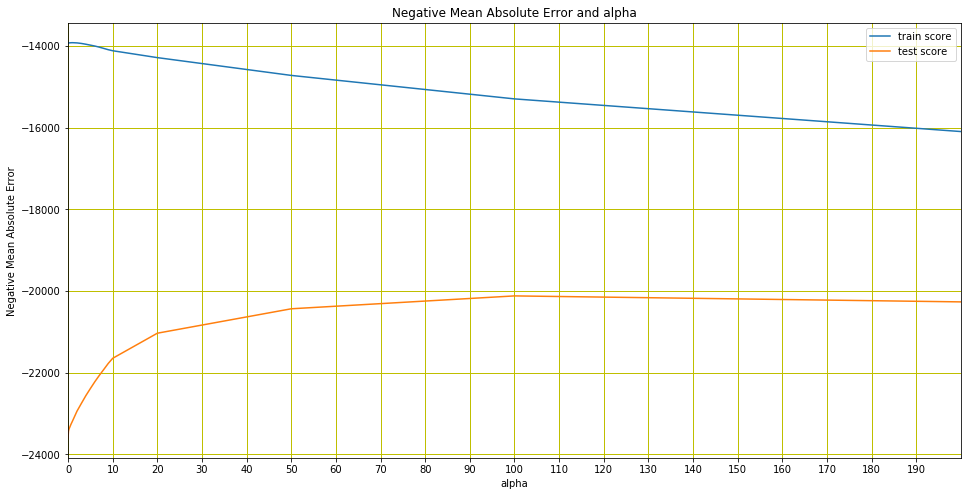

In [107]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color='y', linestyle='-', linewidth=1)
plt.show()

In [108]:
alphaL = 100
lasso = Lasso(alpha=alphaL)
lasso.fit(X_train1, y_train) 

# predict
y_train_pred = lasso.predict(X_train1)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred_lasso = lasso.predict(X_test1)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred_lasso))

0.8819444424065811
0.8718802260258496


In [109]:
# lasso model parameters
model_parameters = list(lasso.coef_)
#model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
#cols = cols.insert(0, "constant")
sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(-113196.821, 'Condition2_Norm'),
 (-35694.852, 'MasVnrType_None'),
 (-34767.405, 'HouseStyle_SLvl'),
 (-31509.02, 'LotShape_IR3'),
 (-30551.442, 'MasVnrType_BrkFace'),
 (-28171.977, 'OverallQual_3'),
 (-28090.108, 'Electrical_Mix'),
 (-28022.214, 'Electrical_FuseP'),
 (-26617.155, 'Exterior2nd_Wd Shng'),
 (-26333.738, 'OverallQual_4'),
 (-26331.387, 'OverallQual_2'),
 (-21149.396, 'Electrical_FuseF'),
 (-21068.602, 'Neighborhood_Edwards'),
 (20351.379, 'SaleType_CWD'),
 (-19752.364, 'OverallQual_8'),
 (18901.487, 'GrLivArea'),
 (18006.281, 'LandContour_HLS'),
 (-17720.718, 'OverallQual_5'),
 (16918.041, 'LandContour_Lvl'),
 (16845.12, 'BsmtQual_none'),
 (-15915.842, 'Neighborhood_Gilbert'),
 (15809.294, 'Neighborhood_Crawfor'),
 (-15219.75, 'BsmtCond_TA'),
 (14221.895, 'RoofMatl_Tar&Grv'),
 (14125.421, 'OverallCond_5'),
 (13430.586, 'Neighborhood_NoRidge'),
 (13164.438, 'Functional_Maj2'),
 (-12433.375, 'GarageType_Detchd'),
 (12364.181, 'SaleType_ConLw'),
 (-11400.181, 'Neighborhood